<a href="https://colab.research.google.com/github/nadirawijaya/Skripsi/blob/main/Skripsi_Nadira_V3C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
  <h1><b>SKRIPSI</b></h1>
  <h2><b>Pengaruh Seleksi Fitur IGWO terhadap Kinerja Random Forest, CatBoost, dan XGBoost<br>untuk Klasifikasi Penyakit Monkeypox Berdasarkan Gejala</b></h2>


  <br><br>
  <b>Diajukan oleh:</b><br>
  Nadira Putri Wijaya<br>
  2106635190<br>
  <a href="mailto:nadira.putri11@ui.ac.id">nadira.putri11@ui.ac.id</a>
  <br><br>

  <b>Dosen Pembimbing:</b><br>
  Dra. Bevina Desjwiandra Handari, M.Sc., Ph.D.
  <br><br><br>

  <b>Program Studi Sarjana Matematika</b><br>
  Departemen Matematika FMIPA Universitas Indonesia<br>
  Depok, Desember 2025
</center>


In [1]:
# =============================================================================
# STEP 1: INISIALISASI PIPELINE & MANAJEMEN PUSTAKA
# =============================================================================

# =============================================================================
# STEP 1A: INSTALASI PUSTAKA YANG DIBUTUHKAN
# =============================================================================
import sys

# Cek apakah kode dijalankan di Google Colab untuk instalasi otomatis
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    print("📦 Lingkungan Google Colab terdeteksi. Menginstal paket yang dibutuhkan...")
    # Instalasi dalam mode senyap (-q) untuk output yang bersih
    !pip install pandas numpy matplotlib seaborn scikit-learn imblearn chardet catboost xgboost -q
    print("✅ Paket instalasi selesai!")
else:
    print("📘 Menjalankan di lingkungan lokal. Pastikan semua paket sudah terinstal.")

# =============================================================================
# STEP 1B: INISIALISASI PIPELINE & MANAJEMEN PUSTAKA
# =============================================================================

# === 1.1 MANAJEMEN PUSTAKA & SISTEM ===
import warnings
import sys
import time
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

from IPython.display import display, HTML

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report)

from xgboost import XGBClassifier
from catboost import CatBoostClassifier # Sekarang ini tidak akan error

# Mengelola peringatan agar output lebih bersih
warnings.filterwarnings('ignore')

# === 1.2 HEADER & PENGECEKAN LINGKUNGAN ===
print("🚀 Menginisialisasi Pipeline Preprocessing Monkeypox...")
print("="*80)

# Cek lagi untuk memastikan modul files diimpor jika di Colab
if 'google.colab' in sys.modules:
    from google.colab import files

print("\n📚 Semua pustaka berhasil diimpor.")

# === 1.3 KONFIGURASI VISUALISASI & DISPLAY ===
plt.style.use('seaborn-v0_8-whitegrid')  # Gaya plot modern & konsisten
sns.set_palette("viridis")               # Palet warna default yang menarik
pd.set_option('display.max_columns', 50) # Tampilkan hingga 50 kolom di output
pd.set_option('display.width', 120)      # Lebar tampilan output Pandas

print("🎨 Pengaturan visualisasi dan display telah diterapkan.")
print("="*80)
print("✅ STEP 1 SELESAI: Pipeline siap untuk memuat data.")
print("="*80)

📦 Lingkungan Google Colab terdeteksi. Menginstal paket yang dibutuhkan...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.3 MB/s eta 0:00:00
✅ Paket instalasi selesai!
🚀 Menginisialisasi Pipeline Preprocessing Monkeypox...

📚 Semua pustaka berhasil diimpor.
🎨 Pengaturan visualisasi dan display telah diterapkan.
✅ STEP 1 SELESAI: Pipeline siap untuk memuat data.


🚀 Memulai Pipeline Data Loading & Global Pre-Processing...

📤 Silakan upload CSV Anda...


Saving MonkeyPox Dataset Skripsi.csv to MonkeyPox Dataset Skripsi.csv
🔄 Loading CSV: 'MonkeyPox Dataset Skripsi.csv'...
✅ Berhasil load. Bentuk awal: (500, 50)

🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼
GLOBAL DATA PRE-PROCESSING (PRE-SPLIT)
🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼🧼
--- 1. Pembersihan Awal (Nama Kolom & Duplikat) ---
✅ Nama kolom dibersihkan dan 0 duplikat dihapus.

--- 2. Standardisasi Nilai Komprehensif ---
   - Menangani kasus khusus seperti 'fever'...
     ✅ Fitur 'fever' diubah menjadi 'fever_presence' dan 'fever_duration_days'.
   - Menerapkan aturan standardisasi umum ('y' -> 'yes', 'none' -> 'no', dll.)...
✅ Proses standardisasi nilai selesai.

📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋
LAPORAN KOMPREHENSIF STANDARDIZASI NILAI
📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋
Ditemukan 19 kolom dengan nilai yang berhasil distandardisasi.

------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'smallpox_vaccination_history'
   - Nilai unik

,Before,After
smallpox_vaccination_history,,
none,340,0
mva six days post exposure or 12 days pre-illness,159,159
mva six days post-exposure or 12 days pre-illness,1,1
no,0,340


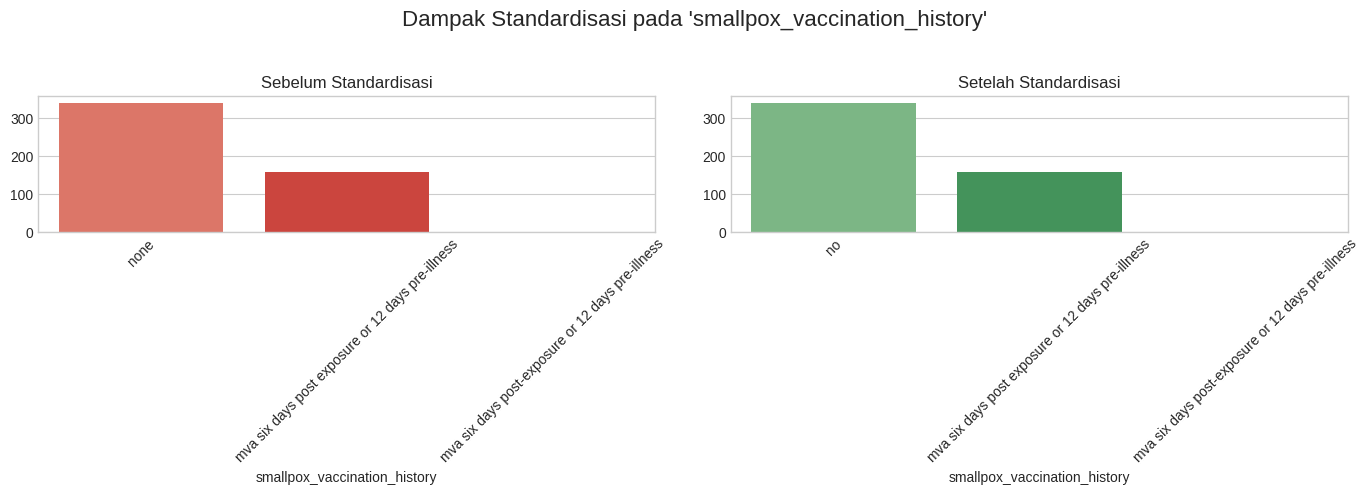


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'hiv_hepatitis_b_and_hepatitis_c_status'
   - Nilai unik berkurang dari 3 menjadi 3.


,Before,After
hiv_hepatitis_b_and_hepatitis_c_status,,
positive,306,0
negative,191,0
not tested (parents negative),3,3
yes,0,306
no,0,191


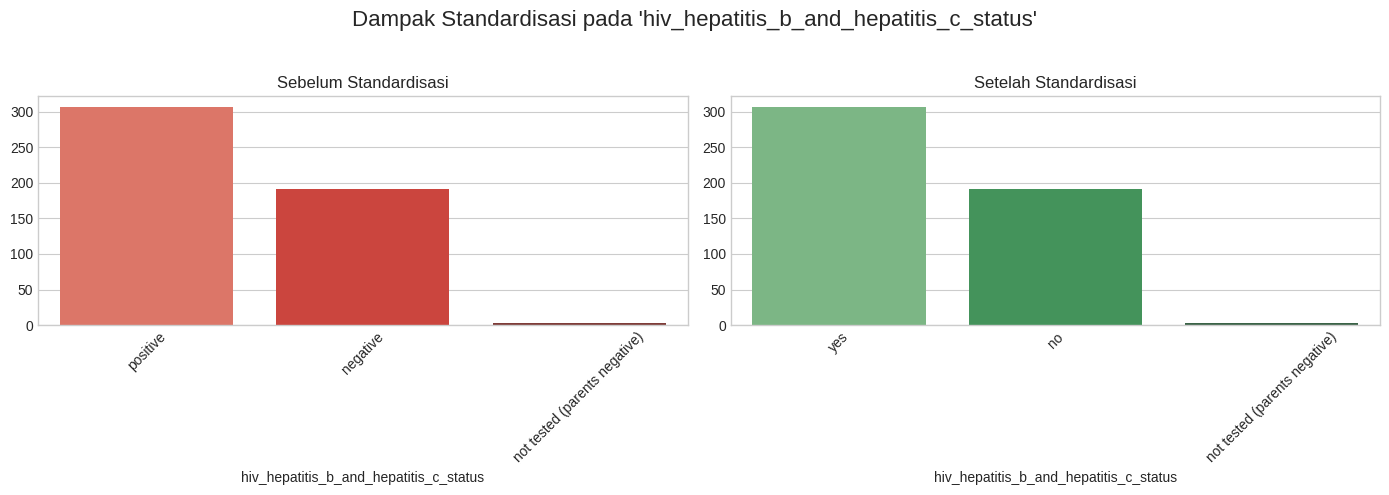


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'rectal_pain_or_pain_on_defecation'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
rectal_pain_or_pain_on_defecation,,
none,321,0
yes,179,179
no,0,321


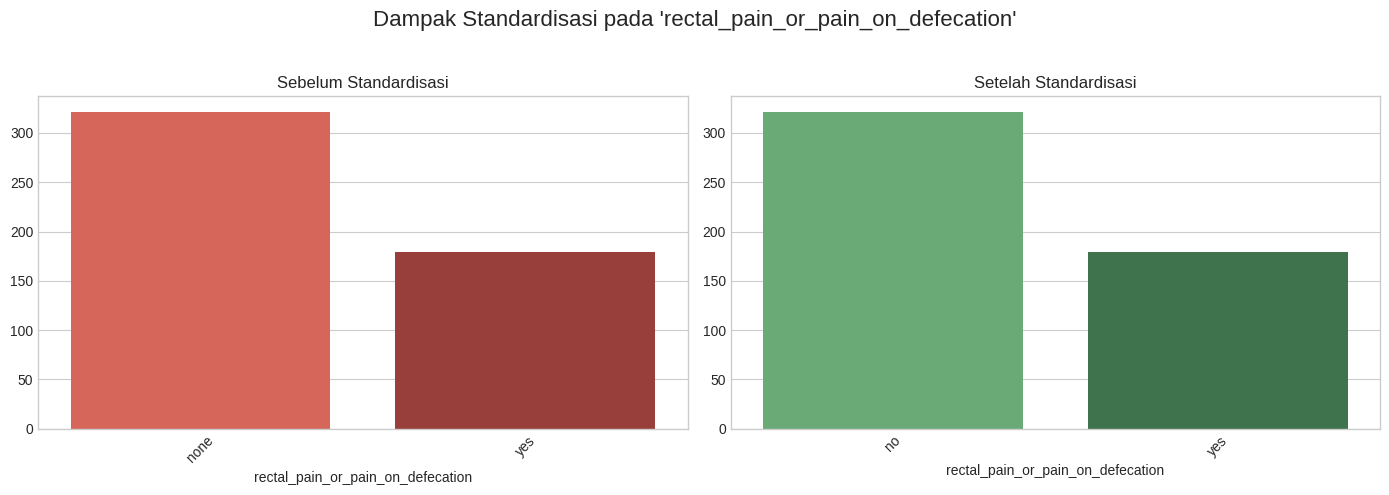


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'dysuria'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
dysuria,,
none,387,0
yes,113,113
no,0,387


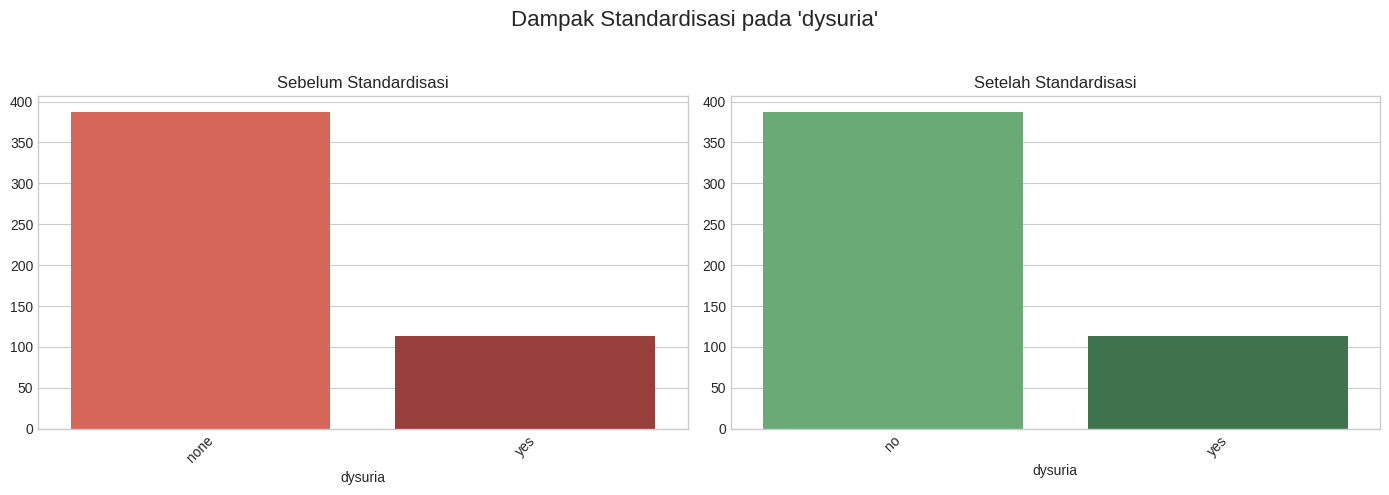


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'bleedingdischarge_per_rectum'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
bleedingdischarge_per_rectum,,
none,451,0
yes,49,49
no,0,451


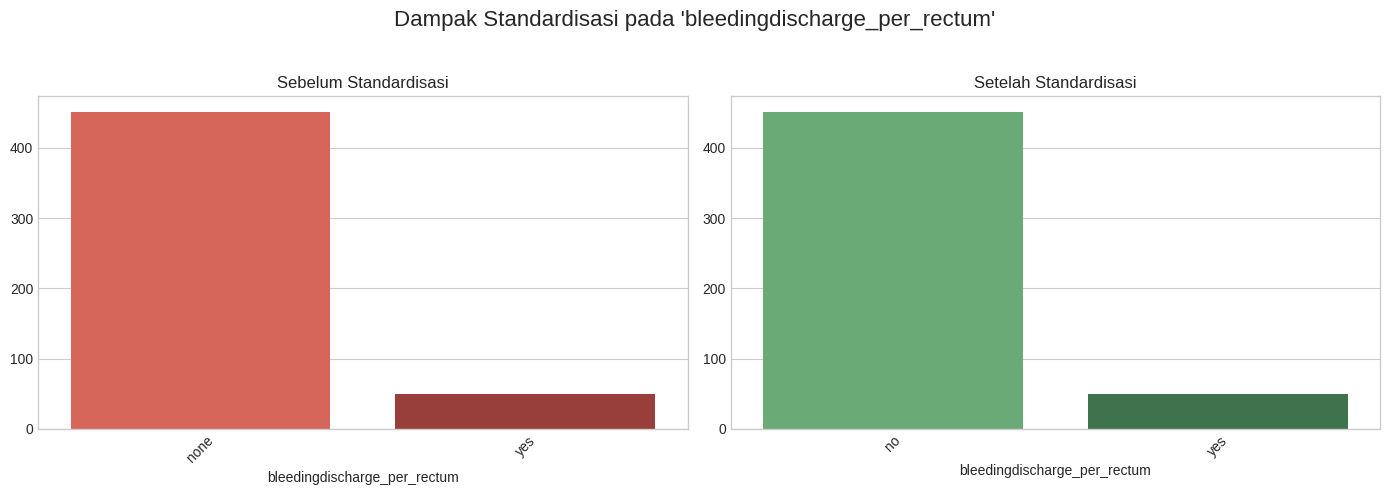


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'conjunctivitis'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
conjunctivitis,,
yes,251,251
none,249,0
no,0,249


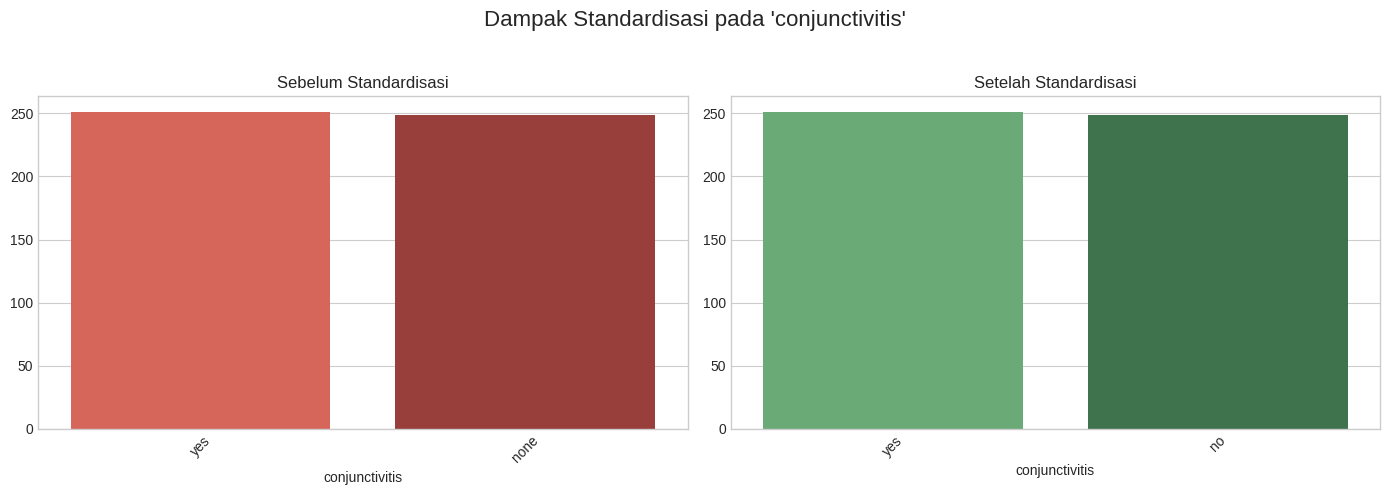


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'back_pain'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
back_pain,,
yes,352,352
none,148,0
no,0,148


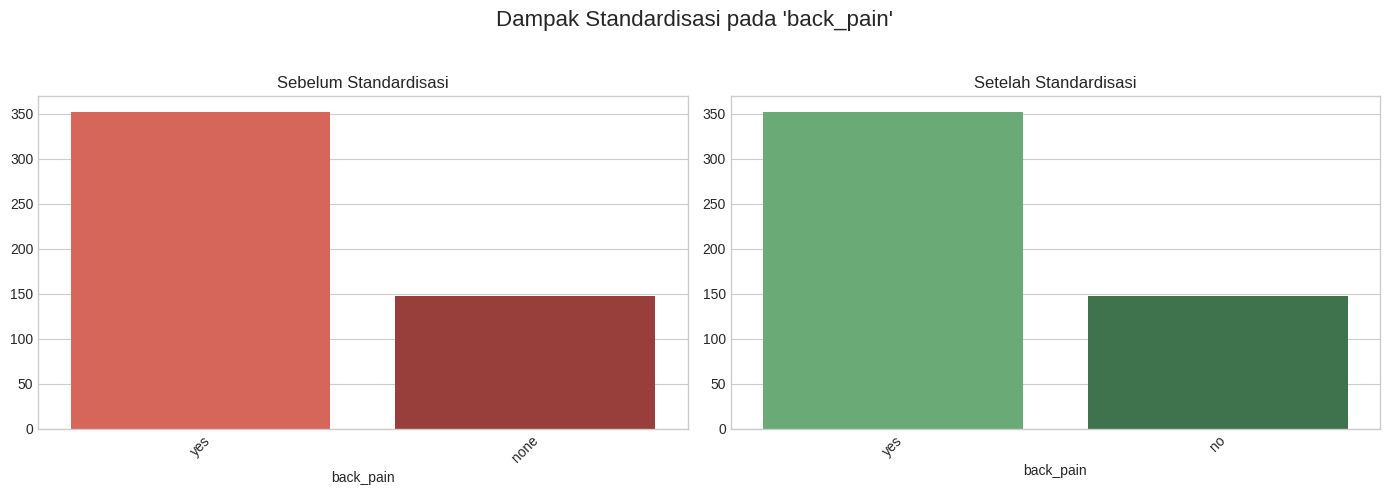


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'myalgia'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
myalgia,,
yes,393,393
none,107,0
no,0,107


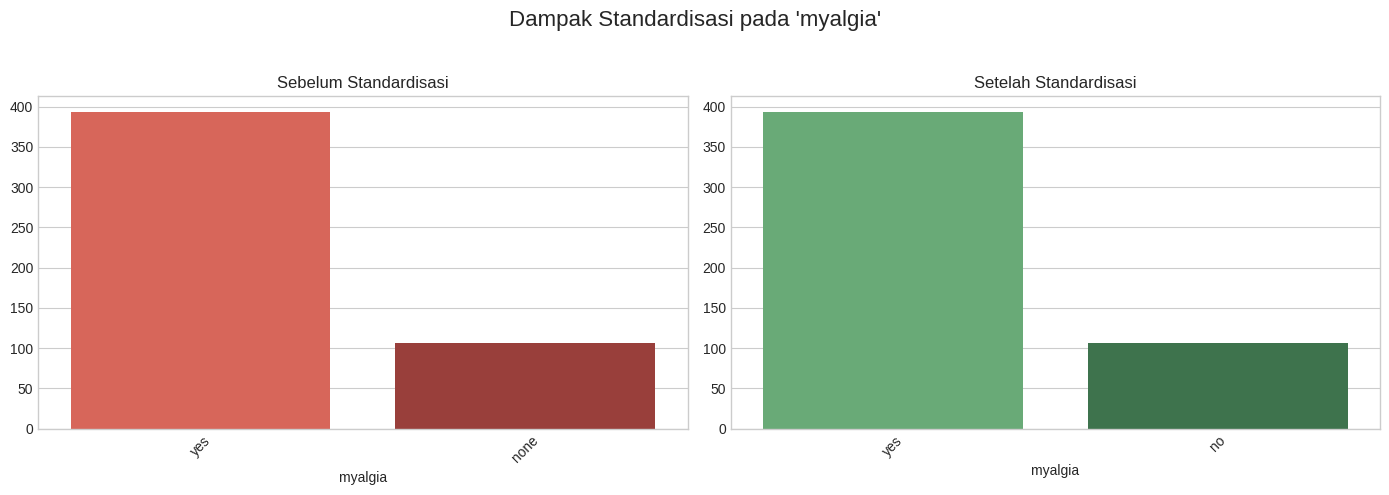


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'headache'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
headache,,
yes,377,377
none,123,0
no,0,123


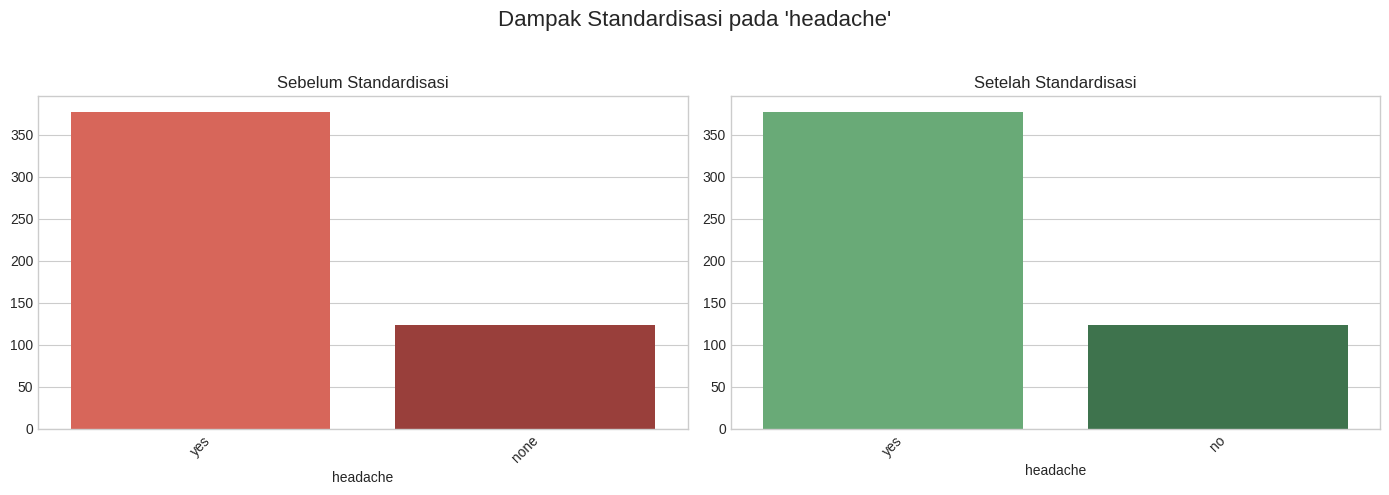


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'lymphadenopathy'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
lymphadenopathy,,
yes,314,314
none,186,0
no,0,186


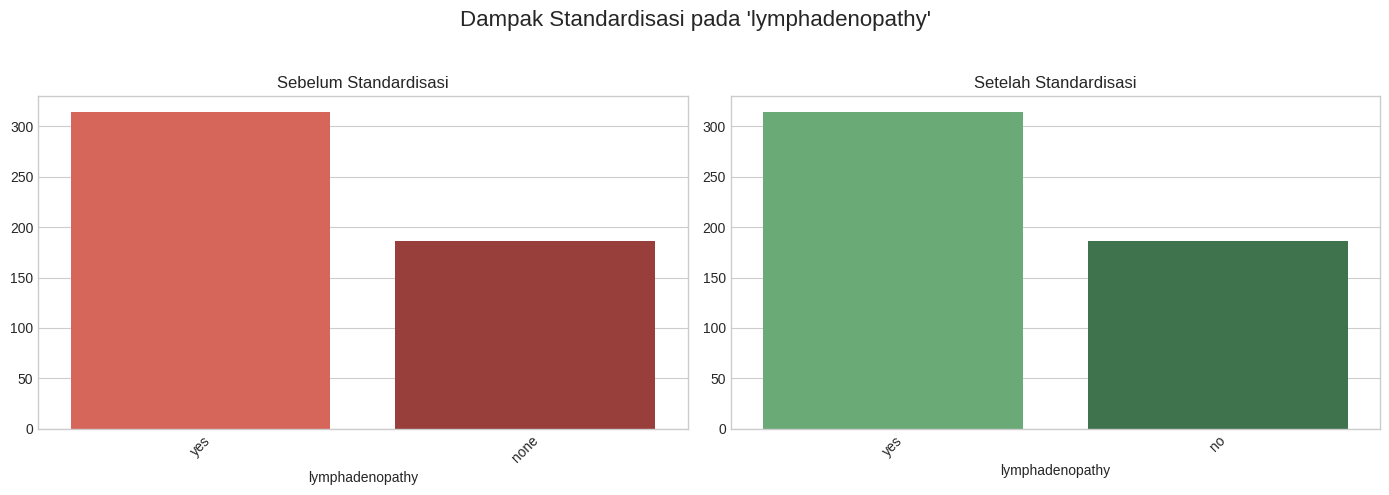


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'complications_of_illness'
   - Nilai unik berkurang dari 7 menjadi 7.


,Before,After
complications_of_illness,,
low mood and emotional lability. ulcerated inguinal lesion with delayed healing,124,124
"deep tissue abscesses, severe pain, and low mood",102,102
"conjunctivitis, painful disruption of thumbnail from subungual lesion",43,43
low mood,15,15
ulcerated inguinal lesion with delayed healing,5,5
pruritis and contact dermatitis from cleaning products,5,5
none,3,0
no,0,3


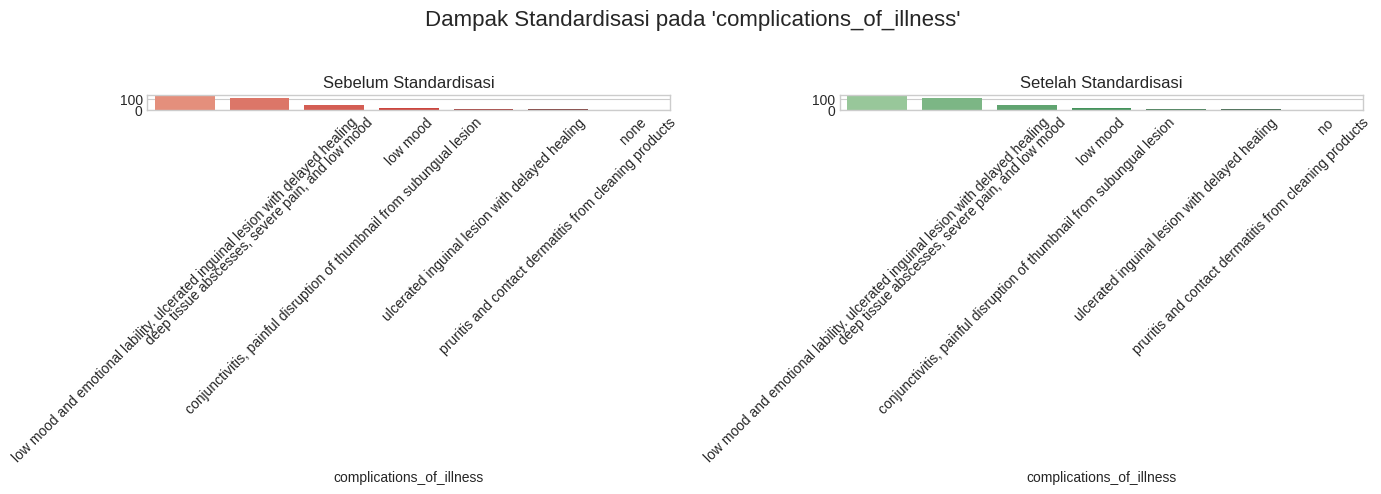


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'monkeypox_viral_dna_detected_in_blood'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
monkeypox_viral_dna_detected_in_blood,,
none,274,0
yes,226,226
no,0,274


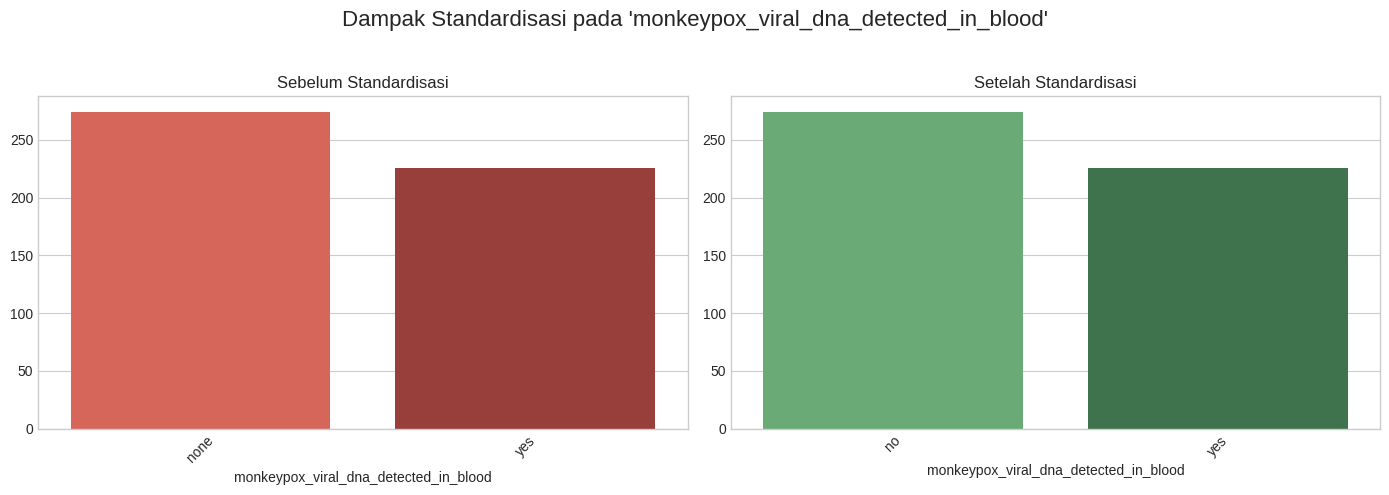


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'monkeypox_viral_dna_detected_in_nose_or_throat_swab'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
monkeypox_viral_dna_detected_in_nose_or_throat_swab,,
yes,434,434
none,66,0
no,0,66


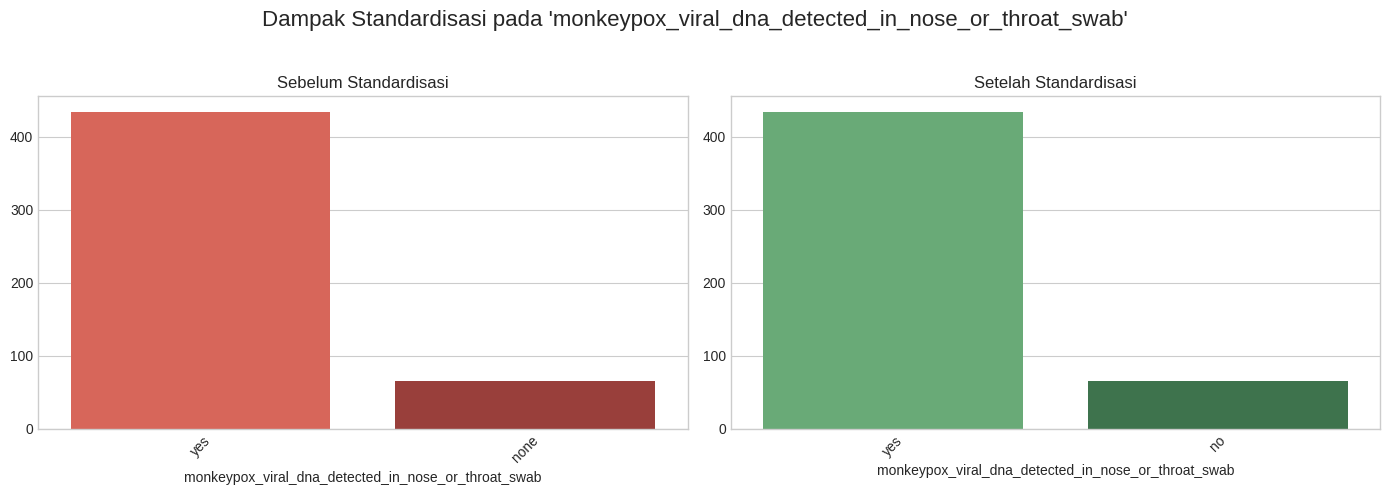


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'monkeypox_viral_dna_detected_in_urine'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
monkeypox_viral_dna_detected_in_urine,,
yes,405,405
none,95,0
no,0,95


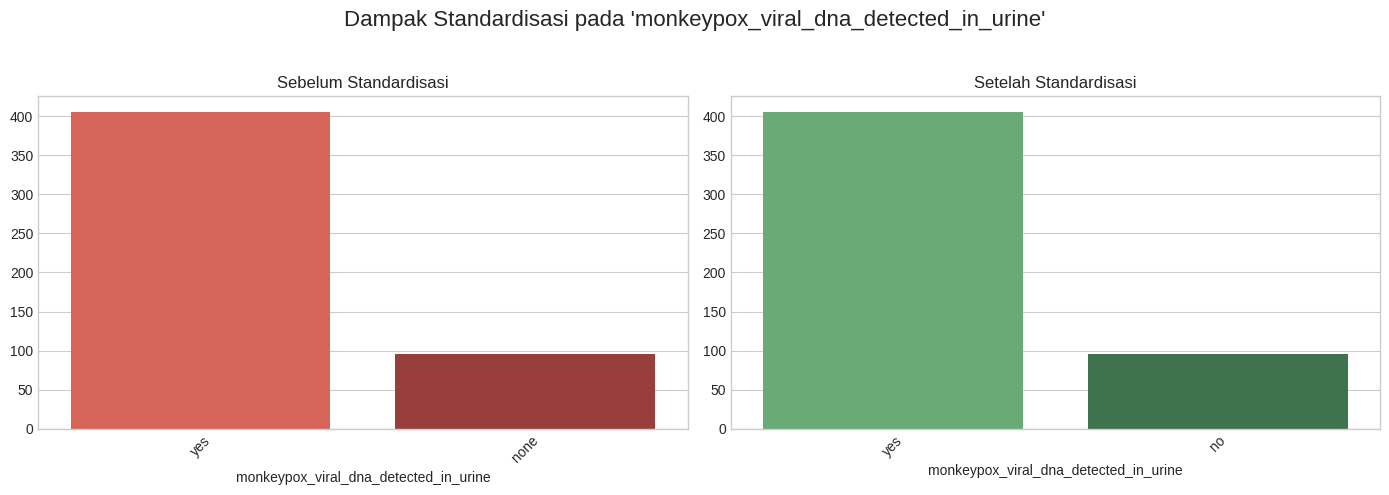


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'antivirals_received'
   - Nilai unik berkurang dari 5 menjadi 5.


,Before,After
antivirals_received,,
brincidofovir 200 mg (three dose) orally,147,147
brincidofovir 200 mg (two dose) orally,140,140
brincidofovir 200 mg (one dose) orally,124,124
none,72,0
tecovirimat 600 mg twice daily for 2 weeks orally,17,17
no,0,72


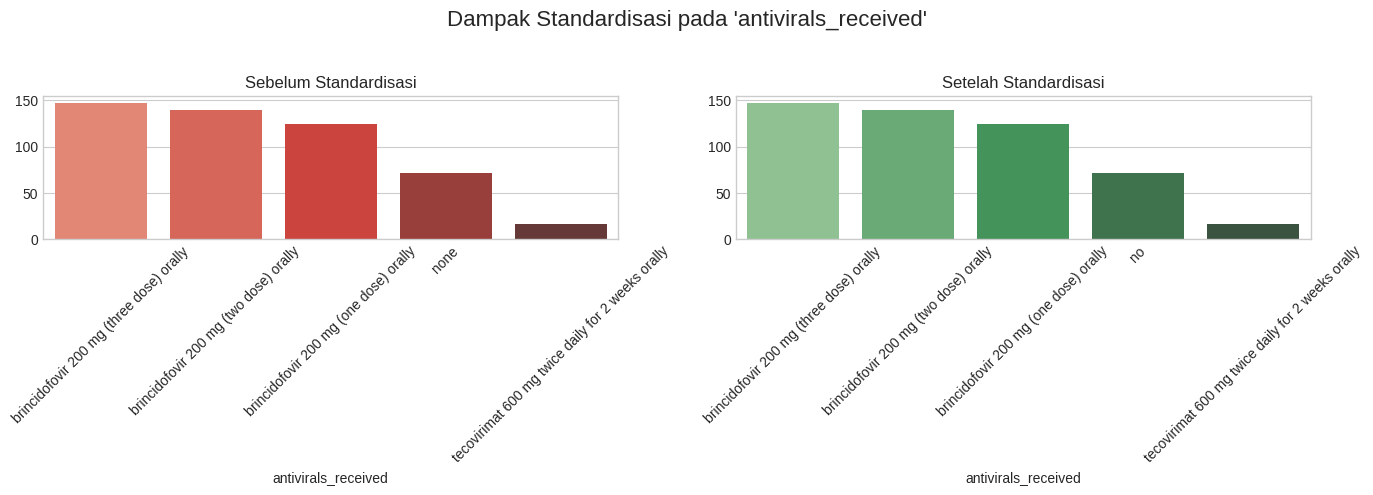


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'complications_of_treatment'
   - Nilai unik berkurang dari 4 menjadi 4.


,Before,After
complications_of_treatment,,
none,235,0
transaminitis (peak alt 331 u/l),122,122
"transaminitis (peak alt 127 u/l), nausea, and abdominal discomfort",103,103
transaminitis (peak alt 550 u/l),40,40
no,0,235


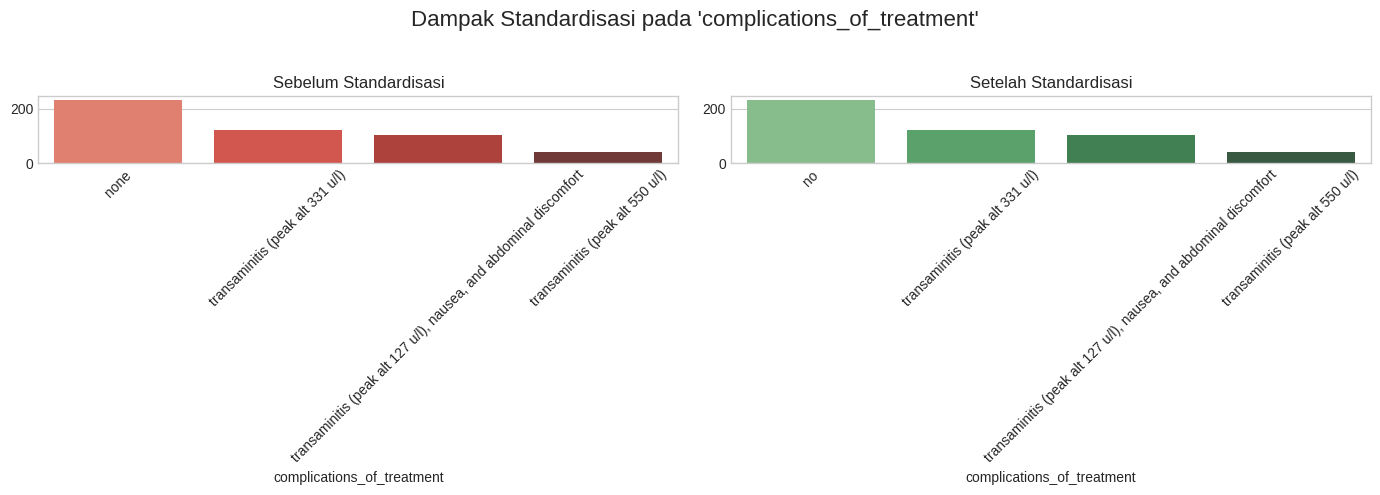


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'sore_throat'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
sore_throat,,
yes,358,358
none,142,0
no,0,142


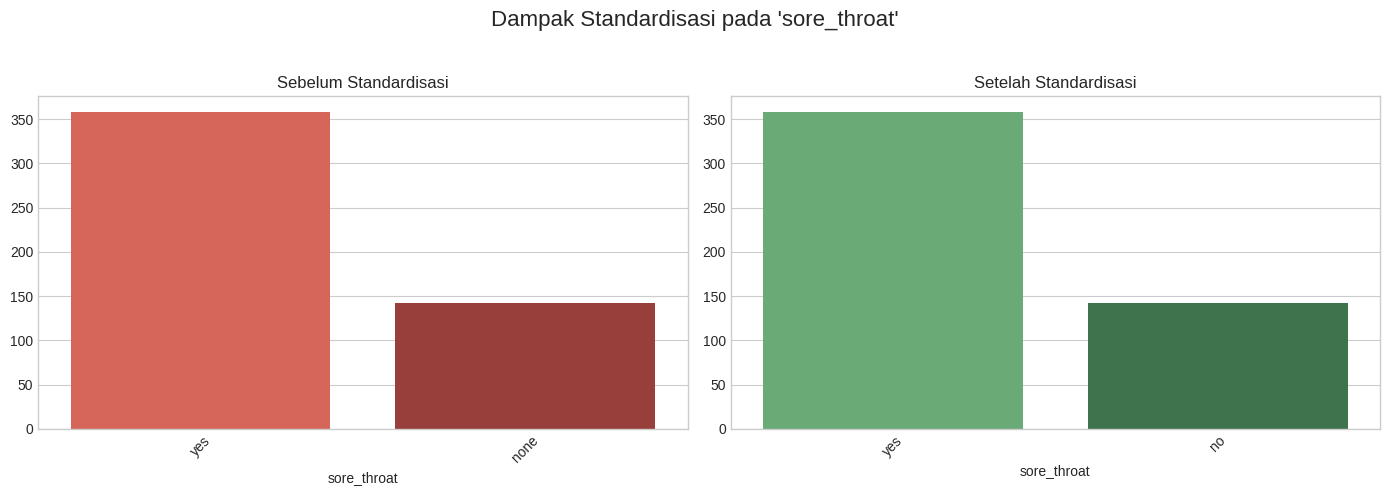


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'chills'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
chills,,
none,360,0
yes,140,140
no,0,360


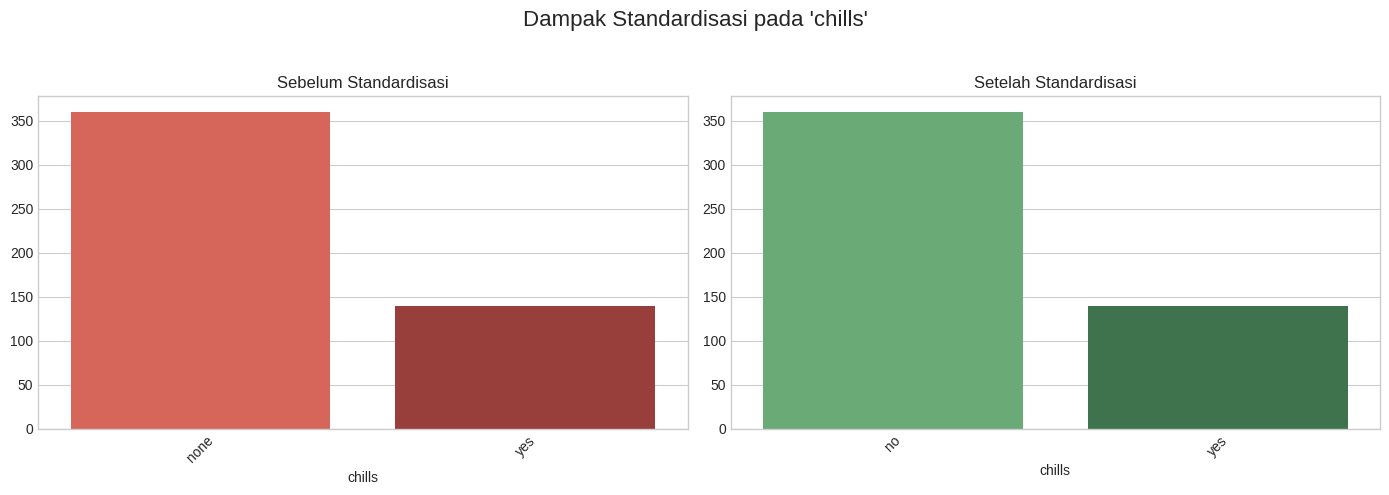


------------------------------------------------------------
🔎 Laporan Detail untuk Kolom: 'diagnosing'
   - Nilai unik berkurang dari 2 menjadi 2.


,Before,After
diagnosing,,
positive,297,0
negative,203,0
yes,0,297
no,0,203


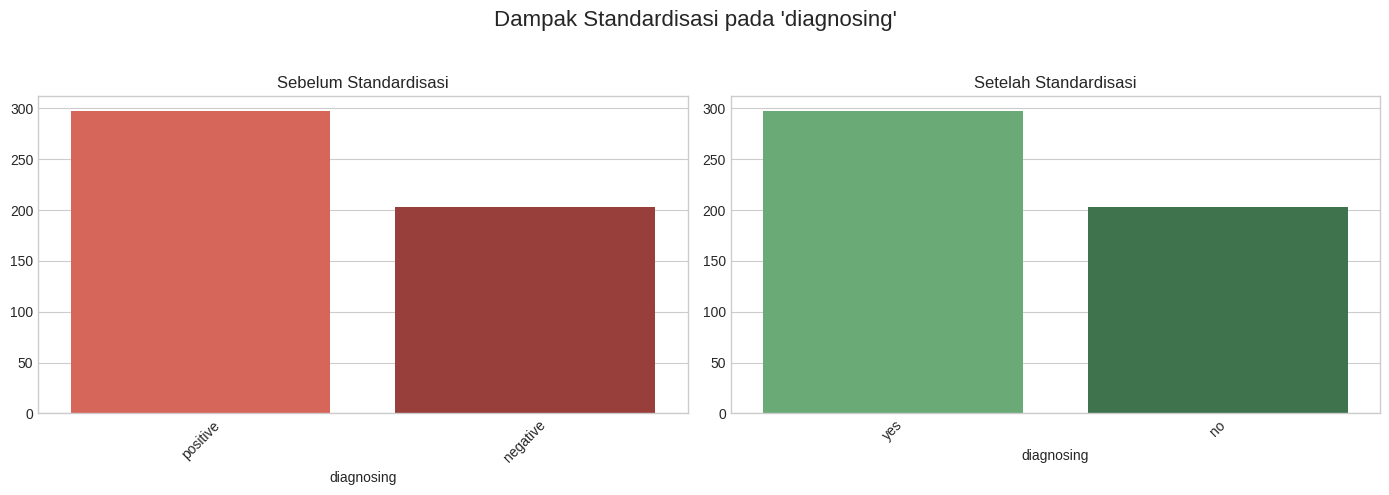


📊 Final Overview after Pre-Processing:
   - Data shape: (500, 50)


,age,sex,transmission_rank,country_of_acquisition,smallpox_vaccination_history,hiv_hepatitis_b_and_hepatitis_c_status,rectal_pain_or_pain_on_defecation,dysuria,bleedingdischarge_per_rectum,conjunctivitis,oropharyngeal_manifestations,back_pain,myalgia,headache,sexually_transmitted_infections,lymphadenopathy,approximate_maximum_number_of_concurrent_lesions,distribution_of_lesions,complications_of_illness,monkeypox_viral_dna_detected_in_blood,monkeypox_viral_dna_detected_in_nose_or_throat_swab,monkeypox_viral_dna_detected_in_urine,antivirals_received,day_of_illness_treatment_commenced,complications_of_treatment,duration_of_hospitalization_with_monkeypox_days,sore_throat,chills,wbc_count_cellsmm3_normaladult_range__40009000,hematocrit_normal_3949_for_men_and3545_for_women,platelet_count_109_plateletsl___normal_adult_range_150400,sodium_level_mmoll__normal_adult_range__136__145,potassium_level_mmoll_normal_adult_range_35__50,blood_urea_nitrogen_level_mgdl_normal_adult_range__1020,creatinine_level_mgdl_normal_adult_range__15_,calcium_level_mmoll_normal_adult_range__9_105,total_bilirubin_level_mgdl__normal_adult_range__03_1_,ast_level_ul_normal_adult_range_035,alt_level_ul_normal_adult_range__035,alp_level_ul_normal_adult_range_40140,arthralgia_67_to_158,albumin_level_mgdl_normal_adult_range_35__55,hospitalized,date_confirmation,rtpcr,outcome_of_monkeypox_infection,diagnosing,diagnosed_disease,fever_presence,fever_duration_days
0,49,female,isolated,nigeria,no,no,yes,no,no,yes,tonsillar erythema,no,yes,yes,rectum,yes,150,"face, scalp, trunk, limbs, palms, glans penis,...",low mood and emotional lability. ulcerated ing...,yes,yes,yes,brincidofovir 200 mg (one dose) orally,7,transaminitis (peak alt 331 u/l),26,yes,yes,22135,48,109,129,2.4,8.4,2.2,8.2,1.0,41,37,147,10.0,2.5,yes,5/6/2022,yes,full recovery,yes,monkeypox,yes,2
1,52,female,index,spain,no,yes,no,yes,no,yes,abscess,yes,no,no,purulent penile discharge.,no,40,"face, trunk, arms, and legs","deep tissue abscesses, severe pain, and low mood",no,no,yes,no,7,"transaminitis (peak alt 127 u/l), nausea, and ...",15,yes,no,14026,48,138,131,1.9,8.4,1.8,7.3,1.1,42,37,145,9.8,1.9,yes,8/31/2022,no,full recovery,yes,monkeypox,yes,1
2,76,male,index,nigeria,no,no,yes,no,yes,yes,pustules,yes,yes,no,throat,yes,100,"face, trunk, limbs, palms, soles, and scrotum","deep tissue abscesses, severe pain, and low mood",yes,yes,yes,brincidofovir 200 mg (two dose) orally,6,transaminitis (peak alt 550 u/l),27,yes,no,26742,56,131,117,2.9,8.3,1.5,6.1,1.0,38,42,149,11.0,2.8,yes,5/12/2022,yes,full recovery,yes,monkeypox,yes,4
3,42,female,secondary,nigeria,mva six days post-exposure or 12 days pre-illness,yes,no,yes,no,no,oedema,yes,no,yes,urethra/urine,no,32,"face, trunk, hands (including nail bed), and l...","conjunctivitis, painful disruption of thumbnai...",yes,yes,yes,brincidofovir 200 mg (two dose) orally,7,"transaminitis (peak alt 127 u/l), nausea, and ...",35,yes,no,24688,49,115,126,2.4,7.8,1.7,8.3,1.6,43,41,143,6.6,2.0,yes,8/13/2022,yes,full recovery,yes,monkeypox,yes,1
4,67,male,isolated,nigeria,no,no,no,yes,no,yes,abscess,no,yes,no,multiple site,yes,100,"face, scalp, trunk, limbs, penile shaft, palms...",ulcerated inguinal lesion with delayed healing,yes,yes,yes,brincidofovir 200 mg (two dose) orally,7,no,39,yes,yes,20346,52,144,126,3.3,7.9,1.8,7.7,1.4,43,38,143,7.0,2.7,yes,5/15/2022,no,full recovery,yes,monkeypox,yes,2



🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
FINALIZING STEP 2: SEPARATING FEATURES (X) AND TARGET (y)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
   - Target (y) ditetapkan sebagai: 'diagnosing'

   - X_initial shape: (500, 49)
   - y_initial shape: (500,)

✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅
STEP 2: GLOBAL PRE-PROCESSING COMPLETED! DATA IS READY FOR SPLITTING.
✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅


In [2]:
# =============================================================================
# STEP 2: DATA LOADING & GLOBAL PRE-PROCESSING (COMPREHENSIVE STANDARDIZATION)
# =============================================================================
import pandas as pd
import numpy as np
import sys
import re
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# --- Pastikan modul Colab dikenali ---
if 'google.colab' in sys.modules:
    from google.colab import files

# === 2.1 LOADER CLASS ===
class EnhancedCSVLoader:
    """Loader CSV yang sudah disederhanakan dan lebih tangguh."""
    def load_csv(self, file_path):
        print(f"🔄 Loading CSV: '{file_path}'...")
        encoding = 'utf-8'
        try:
            with open(file_path, 'rb') as f:
                encoding = chardet.detect(f.read(30000))['encoding']
        except Exception:
            print("   - Warning: Gagal deteksi encoding, default ke utf-8.")
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"✅ Berhasil load. Bentuk awal: {df.shape}")
            return df
        except Exception:
            try:
                print(f"   - Gagal dengan encoding '{encoding}', mencoba fallback 'latin1'...")
                df = pd.read_csv(file_path, encoding='latin1')
                print(f"✅ Berhasil load dengan fallback 'latin1'. Bentuk awal: {df.shape}")
                return df
            except Exception as e2:
                print(f"❌ Gagal load: {e2}"); return None

# === 2.2 PRE-PROCESSING CLASS WITH ENHANCED STANDARDIZATION ===
class DataPreparer:
    """
    Melakukan semua persiapan data yang aman dilakukan SEBELUM data dipisah (splitting),
    dengan logika standardisasi dan rekayasa fitur yang komprehensif.
    """
    def __init__(self, df):
        self.df = df.copy()
        self.report_data = []

    def run(self):
        print("\n" + "🧼"*40 + "\nGLOBAL DATA PRE-PROCESSING (PRE-SPLIT)\n" + "🧼"*40)
        self._initial_cleaning()
        self._standardize_values()
        self._generate_report_and_visuals()
        print("\n📊 Final Overview after Pre-Processing:")
        print(f"   - Data shape: {self.df.shape}")
        display(self.df.head())
        return self.df

    def _initial_cleaning(self):
        print("--- 1. Pembersihan Awal (Nama Kolom & Duplikat) ---")
        cleaned_columns = {col: re.sub(r'[^a-z0-9_]', '', col.strip().lower().replace(' ', '_')) for col in self.df.columns}
        self.df.rename(columns=cleaned_columns, inplace=True)
        id_cols = ['id', 'patient_id']
        self.df.drop(columns=[c for c in id_cols if c in self.df.columns], inplace=True, errors='ignore')
        n_dupes = self.df.duplicated().sum()
        self.df.drop_duplicates(keep='first', inplace=True)
        print(f"✅ Nama kolom dibersihkan dan {n_dupes} duplikat dihapus.")

    def _standardize_values(self):
        print("\n--- 2. Standardisasi Nilai Komprehensif ---")

        # --- Bagian A: Penanganan Kasus Khusus (contoh: 'fever') ---
        print("   - Menangani kasus khusus seperti 'fever'...")
        if 'fever' in self.df.columns:
            # Buat kolom baru untuk keberadaan dan durasi demam
            self.df['fever_presence'] = 'no'
            self.df['fever_duration_days'] = 0

            # Ubah nilai 'fever' menjadi string lowercase untuk konsistensi
            fever_series = self.df['fever'].astype(str).str.lower()

            # Tentukan keberadaan demam
            self.df.loc[fever_series.str.contains('yes|coryzal', na=False), 'fever_presence'] = 'yes'

            # Ekstrak durasi demam menggunakan regular expression
            # \d+ cocok dengan satu atau lebih digit (angka)
            durations = fever_series.str.extract(r'\((\d+)\s*day').astype(float)
            self.df['fever_duration_days'] = durations[0]

            # Isi NaN di durasi: jika demam ada tapi tidak ada durasi, anggap 1 hari. Jika tidak, 0.
            self.df['fever_duration_days'] = self.df.apply(
                lambda row: 1 if pd.isna(row['fever_duration_days']) and row['fever_presence'] == 'yes' else row['fever_duration_days'],
                axis=1
            ).fillna(0).astype(int)

            # Hapus kolom 'fever' asli
            self.df.drop(columns=['fever'], inplace=True)
            print("     ✅ Fitur 'fever' diubah menjadi 'fever_presence' dan 'fever_duration_days'.")

        # --- Bagian B: Standardisasi Nilai Umum ---
        print("   - Menerapkan aturan standardisasi umum ('y' -> 'yes', 'none' -> 'no', dll.)...")
        for col in self.df.select_dtypes(include='object').columns:
            self.df[col] = self.df[col].str.lower().str.strip()

        replace_map = {
            'y': 'yes', 'true': 'yes', '1': 'yes', 'positive': 'yes', 'present': 'yes', 'detected': 'yes',
            'n': 'no', 'false': 'no', '0': 'no', 'negative': 'no', 'absent': 'no', 'not detected': 'no', 'none': 'no',
            'm': 'male', 'man': 'male', 'f': 'female', 'woman': 'female',
            'na': 'unknown', 'n/a': 'unknown', 'not specified': 'unknown', '?': 'unknown'
        }

        # Lakukan pelaporan sebelum replace
        categorical_cols = self.df.select_dtypes(include=['object', 'category']).columns
        for col in categorical_cols:
            before_counts = self.df[col].value_counts()
            # Terapkan replace hanya untuk kolom yang sedang diiterasi
            self.df[col] = self.df[col].replace(replace_map)
            after_counts = self.df[col].value_counts()
            if not before_counts.equals(after_counts):
                self.report_data.append({
                    'column': col, 'before_counts': before_counts, 'after_counts': after_counts,
                    'unique_before': len(before_counts), 'unique_after': len(after_counts)
                })
        print("✅ Proses standardisasi nilai selesai.")

    def _generate_report_and_visuals(self):
        # (Fungsi laporan ini tetap sama seperti sebelumnya, tidak perlu diubah)
        print("\n" + "📋"*40); print("LAPORAN KOMPREHENSIF STANDARDIZASI NILAI"); print("📋"*40)
        if not self.report_data:
            print("✅ Tidak ada nilai yang memerlukan standardisasi. Semua data kategorikal sudah bersih.")
            return
        print(f"Ditemukan {len(self.report_data)} kolom dengan nilai yang berhasil distandardisasi.")
        for report in self.report_data:
            col, before_df, after_df = report['column'], report['before_counts'].to_frame('Before'), report['after_counts'].to_frame('After')
            comparison_df = pd.concat([before_df, after_df], axis=1).fillna(0).astype(int)
            print("\n" + "-"*60); print(f"🔎 Laporan Detail untuk Kolom: '{col}'"); print(f"   - Nilai unik berkurang dari {report['unique_before']} menjadi {report['unique_after']}.")
            display(comparison_df)
            fig, axes = plt.subplots(1, 2, figsize=(14, 5)); fig.suptitle(f"Dampak Standardisasi pada '{col}'", fontsize=16)
            sns.barplot(x=report['before_counts'].index, y=report['before_counts'].values, ax=axes[0], palette='Reds_d'); axes[0].set_title("Sebelum Standardisasi"); axes[0].tick_params(axis='x', rotation=45)
            sns.barplot(x=report['after_counts'].index, y=report['after_counts'].values, ax=axes[1], palette='Greens_d'); axes[1].set_title("Setelah Standardisasi"); axes[1].tick_params(axis='x', rotation=45)
            plt.tight_layout(rect=[0, 0, 1, 0.95]); plt.show()

# =============================================================================
# MAIN FUNCTION & EXECUTION
# =============================================================================
def main_data_loader_and_preparer():
    print("🚀 Memulai Pipeline Data Loading & Global Pre-Processing..."); print("="*80)
    df = None
    if 'google.colab' in sys.modules:
        try:
            print("\n📤 Silakan upload CSV Anda..."); uploaded = files.upload()
            if not uploaded: print("🚫 Tidak ada file diupload."); return None
            file_name = next(iter(uploaded))
            df = EnhancedCSVLoader().load_csv(file_name)
        except Exception as e: print(f"💥 Error saat upload: {e}"); return None
    else:
        file_name = 'MonkeyPox Dataset Skripsi.csv'
        df = EnhancedCSVLoader().load_csv(file_name)

    if df is not None:
        if "Monkeypox" in df.columns:
            df.rename(columns={"Monkeypox": "diagnosing"}, inplace=True)
        return DataPreparer(df).run()
    return None

# --- Jalankan pipeline utama ---
df_prepared = main_data_loader_and_preparer()

# =============================================================================
# PEMISAHAN FITUR & TARGET (untuk input ke Step 3)
# =============================================================================
if df_prepared is not None:
    print("\n" + "🎯"*40); print("FINALIZING STEP 2: SEPARATING FEATURES (X) AND TARGET (y)"); print("🎯"*40)
    TARGET_COLUMN = 'diagnosing'
    if TARGET_COLUMN in df_prepared.columns:
        X_initial = df_prepared.drop(columns=[TARGET_COLUMN], errors='ignore')
        y_initial = df_prepared[TARGET_COLUMN]
        print(f"   - Target (y) ditetapkan sebagai: '{TARGET_COLUMN}'")
        print(f"\n   - X_initial shape: {X_initial.shape}"); print(f"   - y_initial shape: {y_initial.shape}")
        print("\n" + "✅"*60); print("STEP 2: GLOBAL PRE-PROCESSING COMPLETED! DATA IS READY FOR SPLITTING."); print("✅"*60)
    else:
        print(f"🛑 GAGAL: Kolom target '{TARGET_COLUMN}' tidak ditemukan.")
else:
    print("\n" + "🛑"*60); print("STEP 2 FAILED. Periksa error di atas."); print("🛑"*60)

In [3]:
# Menampilkan 10 baris pertama dari tabel fitur (X_initial)
display(X_initial.head(10))

# Menampilkan 10 baris pertama dari tabel target (y_initial)
display(y_initial.head(10))

,age,sex,transmission_rank,country_of_acquisition,smallpox_vaccination_history,hiv_hepatitis_b_and_hepatitis_c_status,rectal_pain_or_pain_on_defecation,dysuria,bleedingdischarge_per_rectum,conjunctivitis,oropharyngeal_manifestations,back_pain,myalgia,headache,sexually_transmitted_infections,lymphadenopathy,approximate_maximum_number_of_concurrent_lesions,distribution_of_lesions,complications_of_illness,monkeypox_viral_dna_detected_in_blood,monkeypox_viral_dna_detected_in_nose_or_throat_swab,monkeypox_viral_dna_detected_in_urine,antivirals_received,day_of_illness_treatment_commenced,complications_of_treatment,duration_of_hospitalization_with_monkeypox_days,sore_throat,chills,wbc_count_cellsmm3_normaladult_range__40009000,hematocrit_normal_3949_for_men_and3545_for_women,platelet_count_109_plateletsl___normal_adult_range_150400,sodium_level_mmoll__normal_adult_range__136__145,potassium_level_mmoll_normal_adult_range_35__50,blood_urea_nitrogen_level_mgdl_normal_adult_range__1020,creatinine_level_mgdl_normal_adult_range__15_,calcium_level_mmoll_normal_adult_range__9_105,total_bilirubin_level_mgdl__normal_adult_range__03_1_,ast_level_ul_normal_adult_range_035,alt_level_ul_normal_adult_range__035,alp_level_ul_normal_adult_range_40140,arthralgia_67_to_158,albumin_level_mgdl_normal_adult_range_35__55,hospitalized,date_confirmation,rtpcr,outcome_of_monkeypox_infection,diagnosed_disease,fever_presence,fever_duration_days
0,49,female,isolated,nigeria,no,no,yes,no,no,yes,tonsillar erythema,no,yes,yes,rectum,yes,150,"face, scalp, trunk, limbs, palms, glans penis,...",low mood and emotional lability. ulcerated ing...,yes,yes,yes,brincidofovir 200 mg (one dose) orally,7,transaminitis (peak alt 331 u/l),26,yes,yes,22135,48,109,129,2.4,8.4,2.2,8.20,1.0,41,37,147,10.0,2.5,yes,5/6/2022,yes,full recovery,monkeypox,yes,2
1,52,female,index,spain,no,yes,no,yes,no,yes,abscess,yes,no,no,purulent penile discharge.,no,40,"face, trunk, arms, and legs","deep tissue abscesses, severe pain, and low mood",no,no,yes,no,7,"transaminitis (peak alt 127 u/l), nausea, and ...",15,yes,no,14026,48,138,131,1.9,8.4,1.8,7.30,1.1,42,37,145,9.8,1.9,yes,8/31/2022,no,full recovery,monkeypox,yes,1
2,76,male,index,nigeria,no,no,yes,no,yes,yes,pustules,yes,yes,no,throat,yes,100,"face, trunk, limbs, palms, soles, and scrotum","deep tissue abscesses, severe pain, and low mood",yes,yes,yes,brincidofovir 200 mg (two dose) orally,6,transaminitis (peak alt 550 u/l),27,yes,no,26742,56,131,117,2.9,8.3,1.5,6.10,1.0,38,42,149,11.0,2.8,yes,5/12/2022,yes,full recovery,monkeypox,yes,4
3,42,female,secondary,nigeria,mva six days post-exposure or 12 days pre-illness,yes,no,yes,no,no,oedema,yes,no,yes,urethra/urine,no,32,"face, trunk, hands (including nail bed), and l...","conjunctivitis, painful disruption of thumbnai...",yes,yes,yes,brincidofovir 200 mg (two dose) orally,7,"transaminitis (peak alt 127 u/l), nausea, and ...",35,yes,no,24688,49,115,126,2.4,7.8,1.7,8.30,1.6,43,41,143,6.6,2.0,yes,8/13/2022,yes,full recovery,monkeypox,yes,1
4,67,male,isolated,nigeria,no,no,no,yes,no,yes,abscess,no,yes,no,multiple site,yes,100,"face, scalp, trunk, limbs, penile shaft, palms...",ulcerated inguinal lesion with delayed healing,yes,yes,yes,brincidofovir 200 mg (two dose) orally,7,no,39,yes,yes,20346,52,144,126,3.3,7.9,1.8,7.70,1.4,43,38,143,7.0,2.7,yes,5/15/2022,no,full recovery,monkeypox,yes,2
5,74,female,index,uk,no,no,no,yes,no,no,tonsillar erythema,yes,yes,yes,throat,yes,40,"face, trunk, limbs, palms, and penile shaft",no,no,yes,no,no,10,no,13,no,yes,21414,48,123,110,3.1,7.6,1.6,8.80,1.8,43,39,141,7.6,2.9,yes,5/15/2022,yes,full recovery,monkeypox,no,0
6,78,male,tertiary,nigeria,no,not tested (parents negative),no,no,yes,yes,pustules,yes,yes,no,unknown,yes,30,"face, trunk, arms, and legs",pruritis and contact dermatitis from cleaning ...,yes,yes,no,no,4,no,22,yes,no,14649,58,131,130,2.9,7.7,2.1,8.50,1.2,39,38,141,6.8,2.7,yes,6/19/2022,no,full recovery,monkeypox,no,0
7,44,female,secondary,spain,no,n

,diagnosing
0,yes
1,yes
2,yes
3,yes
4,yes
5,yes
6,yes
7,yes
8,yes
9,no


In [4]:
# =============================================================================
# STEP 3: DATA SPLITTING (TRAIN-VALIDATION-TEST)
# =============================================================================
from sklearn.model_selection import train_test_split  # Library untuk membagi dataset
import pandas as pd  # Library untuk manipulasi data
import numpy as np  # Library untuk operasi numerik

def split_data(X, y, train_size=0.7, val_size=0.15, test_size=0.15, random_state=42):
    """
    Splits the data into training, validation, and testing sets with stratification
    to maintain the same class proportion in each set.

    # Parameters:
    - X: DataFrame berisi fitur
    - y: Series target
    - train_size, val_size, test_size: Proporsi pembagian data
    - random_state: Seed untuk reproducibility

    # Returns:
    - X_train, X_validation, X_test, y_train, y_validation, y_test
    """
    print("\n" + "🔪"*40)
    print("STEP 3: SPLITTING DATA INTO TRAIN, VALIDATION, & TEST SETS")
    print("🔪"*40)

    # Check jika proporsi total = 1
    if not np.isclose(train_size + val_size + test_size, 1.0):
        print("🛑 ERROR: The sum of train, validation, and test sizes must be 1.0.")
        return None

    # --- First split ---
    # Pisahkan test set dari data (test_size = 0.15, stratify menjaga distribusi kelas target)
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # --- Second split ---
    # Pisahkan training dan validation dari sisa data (train_val)
    val_proportion = val_size / (train_size + val_size)  # hitung proporsi relatif validation
    X_train, X_validation, y_train, y_validation = train_test_split(
        X_train_val, y_train_val, test_size=val_proportion, random_state=random_state, stratify=y_train_val
    )

    # Konfirmasi bahwa split berhasil
    print("✅ Data splitting successful.")
    print("\n" + "-"*40)
    print("Data Shapes:")
    print(f"   - Training Set   (X_train, y_train):      {X_train.shape}, {y_train.shape}  (~{train_size:.0%})")  # Tampilkan ukuran training
    print(f"   - Validation Set (X_validation, y_validation): {X_validation.shape}, {y_validation.shape}  (~{val_size:.0%})")  # Ukuran validation
    print(f"   - Test Set       (X_test, y_test):          {X_test.shape}, {y_test.shape}  (~{test_size:.0%})")  # Ukuran test
    print("-"*40)

    # --- Verifikasi stratifikasi ---
    # Menampilkan distribusi target di setiap set untuk memastikan representasi seimbang
    print("\nTarget Distribution Check:")
    print(f"   - Original:     \n{y.value_counts(normalize=True).sort_index().to_string()}")
    print(f"   - Training Set:   \n{y_train.value_counts(normalize=True).sort_index().to_string()}")
    print(f"   - Validation Set: \n{y_validation.value_counts(normalize=True).sort_index().to_string()}")
    print(f"   - Test Set:       \n{y_test.value_counts(normalize=True).sort_index().to_string()}")

    return X_train, X_validation, X_test, y_train, y_validation, y_test

# =============================================================================
# EXECUTION FOR STEP 3
# =============================================================================
# Step ini dijalankan setelah Step 2, menggunakan `X_initial` dan `y_initial`

if 'X_initial' in locals() and 'y_initial' in locals():
    # Split data dengan rasio 70/15/15 (train/validation/test)
    X_train, X_validation, X_test, y_train, y_validation, y_test = split_data(
        X_initial, y_initial, train_size=0.70, val_size=0.15, test_size=0.15
    )

    # Konfirmasi sukses split
    print("\n" + "🎉"*60)
    print("STEP 3 SUCCESS: Data has been split into three distinct sets.")
    print("The pipeline should now process X_train, X_validation, and X_test consistently in the next steps.")
    print("="*80)
else:
    print("🛑 Could not run Step 3 because `X_initial` and `y_initial` from Step 2 were not found.")  # Error handling



🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪
STEP 3: SPLITTING DATA INTO TRAIN, VALIDATION, & TEST SETS
🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪
✅ Data splitting successful.

----------------------------------------
Data Shapes:
   - Training Set   (X_train, y_train):      (350, 49), (350,)  (~70%)
   - Validation Set (X_validation, y_validation): (75, 49), (75,)  (~15%)
   - Test Set       (X_test, y_test):          (75, 49), (75,)  (~15%)
----------------------------------------

Target Distribution Check:
   - Original:     
diagnosing
no     0.406
yes    0.594
   - Training Set:   
diagnosing
no     0.405714
yes    0.594286
   - Validation Set: 
diagnosing
no     0.413333
yes    0.586667
   - Test Set:       
diagnosing
no     0.4
yes    0.6

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 3 SUCCESS: Data has been split into three distinct sets.
The pipeline should now process X_train, X_validation, and X_test consistently in the next steps.


In [5]:
# =============================================================================
# STEP 4: FEATURE SELECTION & LEAKAGE INVESTIGATION (POST-SPLIT)
# =============================================================================
import pandas as pd
from IPython.display import display, Markdown

class FeatureSelector:
    """
    Melakukan seleksi fitur dan investigasi leakage HANYA pada data latih,
    kemudian menerapkan hasilnya ke semua set data (train, validation, test).
    """
    def __init__(self):
        self.final_feature_list_ = None # Menyimpan daftar fitur final

    def fit(self, X_train, y_train):
        """Belajar fitur mana yang relevan dan tidak bocor dari data latih."""
        print("\n" + "🔎"*40)
        print("STEP 4.1: Investigating Features on TRAINING DATA ONLY")
        print("🔎"*40)

        df_train = pd.concat([X_train, y_train], axis=1)
        target_name = y_train.name

        # 1. Seleksi fitur berdasarkan relevansi klinis
        relevant_df = self._select_clinically_relevant(df_train, target_name)

        # 2. Investigasi leakage dari fitur yang relevan
        leaky_features = self._investigate_leakage(relevant_df, target_name)

        # 3. Simpan daftar fitur final yang lolos
        self.final_feature_list_ = [
            col for col in relevant_df.columns
            if col not in leaky_features and col != target_name
        ]

        print("\n" + "="*60)
        print(f"✅ Investigasi Selesai. Ditemukan {len(self.final_feature_list_)} fitur final yang akan digunakan:")
        print(f"   -> {self.final_feature_list_}")
        print("="*60)
        return self

    def transform(self, *dataframes):
        """Menerapkan daftar fitur final ke semua set data."""
        if self.final_feature_list_ is None:
            raise RuntimeError("Metode .fit() harus dijalankan sebelum .transform()")

        transformed_dfs = [df[self.final_feature_list_].copy() for df in dataframes]
        print("\n✅ Daftar fitur final telah diterapkan ke set Train, Validation, dan Test.")
        return transformed_dfs

    def _select_clinically_relevant(self, df, target_name):
        print("\n--- Tahap A: Memilih fitur prediktor yang relevan secara klinis ---")
        clinically_relevant_predictors = [
            'lymphadenopathy', 'fever', 'headache', 'myalgia', 'back_pain', 'chills', 'sore_throat',
            'oropharyngeal_manifestations', 'conjunctivitis', 'arthralgia', 'rectal_pain_or_pain_on_defecation',
            'dysuria', 'bleedingdischarge_per_rectum', 'distribution_of_lesions',
            'approximate_maximum_number_of_concurrent_lesions', 'platelet_count_x1000000000l_normaladult_range_150_450',
            'hematocrit_normal_3949_for_men_and3545_for_women', 'wbc_count_cellsmm3_normaladult_range__40009000',
            'ast_level_ul_normal_adult_range_035', 'alt_level_ul_normal_adult_range__035',
            'albumin_level_mgdl_normal_adult_range_35__55', 'calcium_level_mmoll_normal_adult_range__9_105',
            'blood_urea_nitrogen_level_mgdl_normal_adult_range_8_20',
            'total_bilirubin_level_mgdl__normal_adult_range__03_1_', 'creatinine_level_mgdl_normal_adult_range_074_135',
            'sodium_level_mmoll_normal_adult_range_135_145', 'potassium_level_mmoll_normal_adult_range_35_50',
            'alp_level_ul_normal_adult_range_40140', 'hiv_hepatitis_b_and_hepatitis_c_status',
            'smallpox_vaccination_history', 'sexually_transmitted_infections', 'age', 'sex', 'country_of_acquisition'
        ]
        target_and_predictors = clinically_relevant_predictors + [target_name]
        existing_cols = [col for col in target_and_predictors if col in df.columns]
        return df[existing_cols]

    def _investigate_leakage(self, df, target_name):
        print("\n--- Tahap B: Investigasi kebocoran data (leakage) ---")
        leaky = []
        features = df.drop(columns=[target_name]).columns
        for feature in features:
            if df[feature].dtype == 'object' or df[feature].nunique() < 20:
                crosstab = pd.crosstab(df[feature], df[target_name])
                if (crosstab == 0).any().any():
                    print("-" * 50 + f"\nAnalisis Crosstab untuk Fitur: '{feature}'")
                    display(crosstab)
                    print(f"🚨 DITEMUKAN LEAKAGE! Fitur di atas akan dihapus.")
                    leaky.append(feature)
        return leaky

# =============================================================================
# EXECUTION FOR STEP 4 (Gunakan blok ini)
# =============================================================================
if 'X_train' in locals():
    print("\n" + "="*80);
    print("🚀 STARTING STEP 4: FEATURE SELECTION & LEAKAGE INVESTIGATION (POST-SPLIT)")
    print("="*80);

    # 1. Inisialisasi dan 'fit' selector HANYA pada data latih
    selector = FeatureSelector()
    selector.fit(X_train, y_train)

    # 2. 'Transform' (terapkan daftar fitur) ke semua set data
    # --- PERUBAHAN DI SINI: Menggunakan nama variabel _std ---
    X_train_std, X_validation_std, X_test_std = selector.transform(
        X_train, X_validation, X_test
    )
    # -----------------------------------------------------------

    print("\n" + "🎉"*60)
    print("STEP 4 SUCCESS: Feature selection complete. Data is now ready for the next step.")
    # --- PERUBAHAN DI SINI: Menyesuaikan nama di laporan ---
    print(f"   - X_train_std shape: {X_train_std.shape}")
    print(f"   - X_validation_std shape: {X_validation_std.shape}")
    print(f"   - X_test_std shape: {X_test_std.shape}")
    # -----------------------------------------------------
    print("="*80)
else:
    print("🛑 Could not run Step 4 because the split data (`X_train`, etc.) from Step 3 was not found.")


🚀 STARTING STEP 4: FEATURE SELECTION & LEAKAGE INVESTIGATION (POST-SPLIT)

🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎
STEP 4.1: Investigating Features on TRAINING DATA ONLY
🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎🔎

--- Tahap A: Memilih fitur prediktor yang relevan secara klinis ---

--- Tahap B: Investigasi kebocoran data (leakage) ---
--------------------------------------------------
Analisis Crosstab untuk Fitur: 'headache'


diagnosing,no,yes
headache,,
no,0,79
yes,142,129


🚨 DITEMUKAN LEAKAGE! Fitur di atas akan dihapus.
--------------------------------------------------
Analisis Crosstab untuk Fitur: 'back_pain'


diagnosing,no,yes
back_pain,,
no,0,110
yes,142,98


🚨 DITEMUKAN LEAKAGE! Fitur di atas akan dihapus.
--------------------------------------------------
Analisis Crosstab untuk Fitur: 'chills'


diagnosing,no,yes
chills,,
no,142,99
yes,0,109


🚨 DITEMUKAN LEAKAGE! Fitur di atas akan dihapus.
--------------------------------------------------
Analisis Crosstab untuk Fitur: 'oropharyngeal_manifestations'


diagnosing,no,yes
oropharyngeal_manifestations,,
abscess,0,46
oedema,0,28
pustules,0,26
tonsillar erythema,42,99
unknown,100,9


🚨 DITEMUKAN LEAKAGE! Fitur di atas akan dihapus.
--------------------------------------------------
Analisis Crosstab untuk Fitur: 'conjunctivitis'


diagnosing,no,yes
conjunctivitis,,
no,142,30
yes,0,178


🚨 DITEMUKAN LEAKAGE! Fitur di atas akan dihapus.
--------------------------------------------------
Analisis Crosstab untuk Fitur: 'rectal_pain_or_pain_on_defecation'


diagnosing,no,yes
rectal_pain_or_pain_on_defecation,,
no,142,77
yes,0,131


🚨 DITEMUKAN LEAKAGE! Fitur di atas akan dihapus.
--------------------------------------------------
Analisis Crosstab untuk Fitur: 'dysuria'


diagnosing,no,yes
dysuria,,
no,142,133
yes,0,75


🚨 DITEMUKAN LEAKAGE! Fitur di atas akan dihapus.
--------------------------------------------------
Analisis Crosstab untuk Fitur: 'bleedingdischarge_per_rectum'


diagnosing,no,yes
bleedingdischarge_per_rectum,,
no,142,176
yes,0,32


🚨 DITEMUKAN LEAKAGE! Fitur di atas akan dihapus.
--------------------------------------------------
Analisis Crosstab untuk Fitur: 'distribution_of_lesions'


diagnosing,no,yes
distribution_of_lesions,,
"face, scalp, trunk, limbs, palms, glans penis, and scrotum",0,95
"face, scalp, trunk, limbs, penile shaft, palms, and soles",41,4
"face, trunk, arms, and hands",0,9
"face, trunk, arms, and legs",101,43
"face, trunk, hands (including nail bed), and labia majora",0,28
"face, trunk, limbs, palms, and penile shaft",0,2
"face, trunk, limbs, palms, soles, and scrotum",0,27


🚨 DITEMUKAN LEAKAGE! Fitur di atas akan dihapus.
--------------------------------------------------
Analisis Crosstab untuk Fitur: 'approximate_maximum_number_of_concurrent_lesions'


diagnosing,no,yes
approximate_maximum_number_of_concurrent_lesions,,
10,0,9
30,0,1
32,0,27
40,0,44
50,0,1
56,43,0
57,1,0
59,2,0
60,4,0


🚨 DITEMUKAN LEAKAGE! Fitur di atas akan dihapus.
--------------------------------------------------
Analisis Crosstab untuk Fitur: 'total_bilirubin_level_mgdl__normal_adult_range__03_1_'


diagnosing,no,yes
total_bilirubin_level_mgdl__normal_adult_range__03_1_,,
0.3,6,0
0.4,5,0
0.5,13,0
0.6,13,0
0.7,12,0
0.8,12,0
0.9,8,0
1.0,8,17
1.1,5,21


🚨 DITEMUKAN LEAKAGE! Fitur di atas akan dihapus.
--------------------------------------------------
Analisis Crosstab untuk Fitur: 'hiv_hepatitis_b_and_hepatitis_c_status'


diagnosing,no,yes
hiv_hepatitis_b_and_hepatitis_c_status,,
no,0,141
not tested (parents negative),0,1
yes,142,66


🚨 DITEMUKAN LEAKAGE! Fitur di atas akan dihapus.
--------------------------------------------------
Analisis Crosstab untuk Fitur: 'smallpox_vaccination_history'


diagnosing,no,yes
smallpox_vaccination_history,,
mva six days post exposure or 12 days pre-illness,61,53
mva six days post-exposure or 12 days pre-illness,0,1
no,81,154


🚨 DITEMUKAN LEAKAGE! Fitur di atas akan dihapus.
--------------------------------------------------
Analisis Crosstab untuk Fitur: 'sexually_transmitted_infections'


diagnosing,no,yes
sexually_transmitted_infections,,
multiple site,0,4
purulent penile discharge.,0,40
rectal perforation,0,9
rectum,0,95
throat,0,29
unknown,142,1
urethra/urine,0,30


🚨 DITEMUKAN LEAKAGE! Fitur di atas akan dihapus.
--------------------------------------------------
Analisis Crosstab untuk Fitur: 'country_of_acquisition'


diagnosing,no,yes
country_of_acquisition,,
argentina,1,5
australia,6,0
bangladesh,0,1
belgium,2,0
cambodia,13,3
canada,3,7
congo,0,1
cote d’ivoire,0,2
denmark,4,10


🚨 DITEMUKAN LEAKAGE! Fitur di atas akan dihapus.

✅ Investigasi Selesai. Ditemukan 12 fitur final yang akan digunakan:
   -> ['lymphadenopathy', 'myalgia', 'sore_throat', 'hematocrit_normal_3949_for_men_and3545_for_women', 'wbc_count_cellsmm3_normaladult_range__40009000', 'ast_level_ul_normal_adult_range_035', 'alt_level_ul_normal_adult_range__035', 'albumin_level_mgdl_normal_adult_range_35__55', 'calcium_level_mmoll_normal_adult_range__9_105', 'alp_level_ul_normal_adult_range_40140', 'age', 'sex']

✅ Daftar fitur final telah diterapkan ke set Train, Validation, dan Test.

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 4 SUCCESS: Feature selection complete. Data is now ready for the next step.
   - X_train_std shape: (350, 12)
   - X_validation_std shape: (75, 12)
   - X_test_std shape: (75, 12)


---
### **STEP 5: Analisis Karakteristik Fitur Kategorikal Awal (EDA)** 📊

Setelah data dibersihkan dan distandarisasi secara nilai, langkah selanjutnya adalah melakukan Analisis Data Eksplorasi (EDA) sederhana pada data latih. Tujuannya adalah untuk memahami karakteristik dasar dari setiap fitur kategorikal, terutama jumlah nilai unik (kardinalitas) yang dimilikinya.

Fitur dengan kardinalitas yang aneh atau nilai yang tidak konsisten seringkali memerlukan perhatian khusus pada tahap *feature engineering*.

In [6]:
# =============================================================================
# STEP 5: ANALISIS KARAKTERISTIK FITUR KATEGORIKAL (POST-SELECTION)
# =============================================================================
import pandas as pd
from IPython.display import display

# --- PERBAIKAN: Gunakan X_train_selected dari Step 4 yang baru ---
if 'X_train_selected' in locals():
    print("🔬 Menganalisis fitur-fitur kategorikal pada data latih (X_train_selected)...")

    # Pilih hanya kolom kategorikal (tipe 'object')
    categorical_cols = X_train_selected.select_dtypes(include=['object', 'category']).columns

    if not categorical_cols.empty:
        # Buat DataFrame untuk menampung hasil analisis
        analysis_list = []
        for col in categorical_cols:
            unique_values = X_train_selected[col].unique()
            num_unique = len(unique_values)
            analysis_list.append({
                'Nama Fitur': col,
                'Jumlah Nilai Unik': num_unique,
                'Contoh Nilai': list(unique_values[:3]) # Ambil 3 contoh
            })

        df_cardinality_analysis = pd.DataFrame(analysis_list)

        print("\n--- Hasil Analisis Kardinalitas Fitur Kategorikal ---")
        display(df_cardinality_analysis.style.bar(subset=['Jumlah Nilai Unik'], color='#5fba7d'))
        print("\n" + "🎉"*60)
        print("STEP 5 SUCCESS: Analisis fitur kategorikal selesai.")
        print("="*80)
    else:
        print("\n✅ Tidak ada fitur kategorikal yang tersisa untuk dianalisis setelah proses seleksi.")
        print("\n" + "🎉"*60)
        print("STEP 5 SUCCESS: Selesai (tidak ada tindakan yang diperlukan).")
        print("="*80)

else:
    print("🛑 Could not run Step 5 because the selected data (`X_train_selected`, etc.) from Step 4 was not found.")

🛑 Could not run Step 5 because the selected data (`X_train_selected`, etc.) from Step 4 was not found.


🔬 Menganalisis distribusi nilai pada kolom 'myalgia' di data latih...

--- Value Counts untuk Kolom 'myalgia' ---


,count
myalgia,
yes,280
no,70



--- Distribusi 'myalgia' vs Diagnosis (Crosstab) ---


diagnosing,no,yes
myalgia,,
no,3,67
yes,139,141



--- Visualisasi Distribusi 'myalgia' vs Diagnosis ---


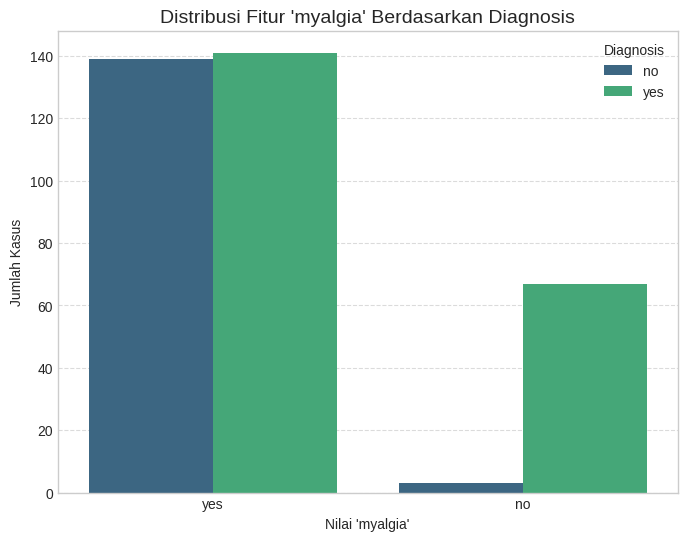

In [7]:
# =============================================================================
# STEP 6: ANALISIS DIAGNOSTIK PADA FITUR YANG DIPILIH (ROBUST)
# =============================================================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Pilih fitur yang ingin dianalisis dari X_train (yang belum di-scale) ---
# 'myalgia' adalah contoh fitur yang lolos dari pembersihan di Step 2.
# Anda bisa menggantinya dengan fitur lain yang ada di X_train.columns
feature_to_analyze = 'myalgia'

print(f"🔬 Menganalisis distribusi nilai pada kolom '{feature_to_analyze}' di data latih...")

# --- Lakukan pengecekan apakah fitur yang dipilih benar-benar ada ---
if feature_to_analyze in X_train.columns:

    # Gabungkan sementara X_train (bukan X_train_std) dengan y_train untuk analisis
    df_diagnostic = X_train.copy()
    df_diagnostic['diagnosing'] = y_train

    # 1. Tampilkan Value Counts dari fitur
    print(f"\n--- Value Counts untuk Kolom '{feature_to_analyze}' ---")
    display(df_diagnostic[feature_to_analyze].value_counts())

    # 2. Gunakan crosstab untuk melihat distribusi nilai fitur per kelas target
    print(f"\n--- Distribusi '{feature_to_analyze}' vs Diagnosis (Crosstab) ---")
    crosstab_result = pd.crosstab(df_diagnostic[feature_to_analyze], df_diagnostic['diagnosing'])
    display(crosstab_result.style.background_gradient(cmap='summer'))

    # 3. Gunakan countplot untuk visualisasi yang lebih jelas
    print(f"\n--- Visualisasi Distribusi '{feature_to_analyze}' vs Diagnosis ---")
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature_to_analyze, hue='diagnosing', data=df_diagnostic, palette='viridis')
    plt.title(f"Distribusi Fitur '{feature_to_analyze}' Berdasarkan Diagnosis", fontsize=14)
    plt.xlabel(f"Nilai '{feature_to_analyze}'")
    plt.ylabel("Jumlah Kasus")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Diagnosis')
    plt.show()

else:
    print("\n" + "⚠️"*60)
    print(f"PERINGATAN: Kolom '{feature_to_analyze}' tidak ditemukan dalam data latih (X_train).")
    print("   Ini kemungkinan besar karena fitur tersebut telah dihapus secara otomatis pada Step 2.")
    print("   Silakan pilih fitur lain yang ada dari daftar berikut:")
    print(list(X_train.columns))
    print("⚠️"*60)

In [8]:
# =============================================================================
# STEP 7: MISSING VALUE HANDLING (FINAL REVISION WITH SYNTAX FIX)
# =============================================================================
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

class ComprehensiveMissingValueHandler:
    """
    Analyzes missing values, then imputes them correctly on pre-split data
    using a revised logic to prevent data leakage.
    """
    def __init__(self):
        self.imputation_plan = None
        self.num_imputer = SimpleImputer(strategy='median')
        self.cat_imputer = SimpleImputer(strategy='most_frequent')
        self.num_cols_to_impute = []
        self.cat_cols_to_impute = []

    # --- PERBAIKAN: Menghapus parameter df_original yang tidak digunakan ---
    def run_pipeline(self, X_train, X_validation, X_test):
        """Executes the full analysis and imputation pipeline."""
        self._analyze_missing_values(X_train) # Analisis hanya di training data

        if self.imputation_plan is None or self.imputation_plan.empty:
            print("✅ No missing values to impute. Returning original data sets.")
            return X_train, X_validation, X_test

        return self._execute_imputation(X_train, X_validation, X_test)

    def _analyze_missing_values(self, df):
        """Performs analysis on the training data to generate an imputation plan."""
        print("\n" + "📊"*40)
        print("PART 1: DEEP ANALYSIS OF MISSING VALUES (PLANNING STAGE ON TRAINING DATA)")
        print("📊"*40)
        missing = df.isnull().sum()
        missing = missing[missing > 0]
        if missing.empty:
            self.imputation_plan = pd.DataFrame()
            return

        print(f"Found {len(missing)} columns with missing values. Generating analysis and strategy plan...")
        plan_details = [{
            'Column': col,
            'Missing Count': count,
            'Missing (%)': f"{(count / len(df)) * 100:.1f}%",
            'Data Type': str(df[col].dtype),
            'Recommended Strategy': "Median" if pd.api.types.is_numeric_dtype(df[col]) else "Mode"
        } for col, count in missing.items()]
        self.imputation_plan = pd.DataFrame(plan_details).sort_values(by='Missing Count', ascending=False)
        print("\n📋 Imputation Plan Summary:")
        display(self.imputation_plan.style.background_gradient(cmap='Reds', subset=['Missing Count']))
        self._create_advanced_missing_visualizations(df)

    def _create_advanced_missing_visualizations(self, df):
        print("\n📈 Generating Advanced Missing Value Visualizations...")
        fig, axes = plt.subplots(1, 2, figsize=(16, 6)); fig.suptitle('Missing Values Analysis on Training Data', fontsize=16)
        missing_df = self.imputation_plan
        sns.heatmap(df[missing_df['Column']].isnull(), cbar=False, cmap='viridis_r', ax=axes[0]); axes[0].set_title('Missing Values Heatmap Pattern')
        top_10 = missing_df.head(10)
        sns.barplot(x='Missing Count', y='Column', data=top_10, ax=axes[1], palette='viridis')
        axes[1].set_title('Top 10 Columns with Missing Values')
        plt.tight_layout(rect=[0, 0, 1, 0.96]); plt.show()

    def _execute_imputation(self, X_train, X_validation, X_test):
        """Executes the imputation using the correct anti-data leakage workflow."""
        print("\n" + "⚡"*40)
        print("PART 2: EXECUTING IMPUTATION ON SPLIT DATA (CORRECT LOGIC)")
        print("⚡"*40)

        self.num_cols_to_impute = self.imputation_plan[self.imputation_plan['Recommended Strategy'] == 'Median']['Column'].tolist()
        self.cat_cols_to_impute = self.imputation_plan[self.imputation_plan['Recommended Strategy'] == 'Mode']['Column'].tolist()

        self.num_cols_to_impute = [col for col in self.num_cols_to_impute if col in X_train.columns]
        self.cat_cols_to_impute = [col for col in self.cat_cols_to_impute if col in X_train.columns]

        X_train_imputed, X_validation_imputed, X_test_imputed = X_train.copy(), X_validation.copy(), X_test.copy()

        print("1. Fitting imputers ONLY on the TRAINING data...")
        if self.num_cols_to_impute:
            self.num_imputer.fit(X_train[self.num_cols_to_impute])
        if self.cat_cols_to_impute:
            self.cat_imputer.fit(X_train[self.cat_cols_to_impute])

        print("2. Transforming TRAIN, VALIDATION, and TEST data separately...")
        if self.num_cols_to_impute:
            X_train_imputed[self.num_cols_to_impute] = self.num_imputer.transform(X_train[self.num_cols_to_impute])
            X_validation_imputed[self.num_cols_to_impute] = self.num_imputer.transform(X_validation[self.num_cols_to_impute])
            X_test_imputed[self.num_cols_to_impute] = self.num_imputer.transform(X_test[self.num_cols_to_impute])
        if self.cat_cols_to_impute:
            X_train_imputed[self.cat_cols_to_impute] = self.cat_imputer.transform(X_train[self.cat_cols_to_impute])
            X_validation_imputed[self.cat_cols_to_impute] = self.cat_imputer.transform(X_validation[self.cat_cols_to_impute])
            X_test_imputed[self.cat_cols_to_impute] = self.cat_imputer.transform(X_test[self.cat_cols_to_impute])

        self._generate_imputation_report(X_train_imputed, X_validation_imputed, X_test_imputed)
        return X_train_imputed, X_validation_imputed, X_test_imputed

    def _generate_imputation_report(self, X_train, X_validation, X_test):
        print("\n" + "📋"*40)
        print("PART 3: IMPUTATION EXECUTION REPORT")
        print("📋"*40)
        print("\nFinal Verification:")
        print(f"   - Missing values remaining in X_train: {X_train.isnull().sum().sum()}")
        print(f"   - Missing values in X_validation: {X_validation.isnull().sum().sum()}")
        print(f"   - Missing values in X_test: {X_test.isnull().sum().sum()}")
        if X_train.isnull().sum().sum() == 0:
            print("   - ✅ SUCCESS. All missing values have been handled correctly.")
        else:
            print("   - ⚠️ WARNING. Some missing values remain.")

# =============================================================================
# EXECUTION FOR STEP 7
# =============================================================================
if 'X_train_std' in locals():
    print("\n" + "="*80)
    print("🚀 STARTING STEP 7: MISSING VALUE ANALYSIS & HANDLING")
    print("="*80)

    handler = ComprehensiveMissingValueHandler()

    # --- PERBAIKAN: Menghapus argumen df_final_step2 yang tidak perlu ---
    X_train_imputed, X_validation_imputed, X_test_imputed = handler.run_pipeline(
        X_train_std, X_validation_std, X_test_std
    )

    print("\n" + "🎉"*60)
    print("STEP 7 SUCCESS: Missing values have been handled correctly across all data splits.")
    print("="*80)
else:
    print("🛑 Could not run Step 7 because the standardized data (`X_train_std`, etc.) from Step 4 was not found.")


🚀 STARTING STEP 7: MISSING VALUE ANALYSIS & HANDLING

📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
PART 1: DEEP ANALYSIS OF MISSING VALUES (PLANNING STAGE ON TRAINING DATA)
📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
✅ No missing values to impute. Returning original data sets.

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 7 SUCCESS: Missing values have been handled correctly across all data splits.


<details>
<summary>📖 Penjelasan Step 6: Feature Engineering, Encoding, & Scaling</summary>

**Step 6** adalah tahap final preprocessing sebelum model training. Berikut rinciannya:

---

### 🔹 6.1 Feature Engineering
- Membuat fitur baru berdasarkan domain knowledge:
  - `symptom_score`: jumlah gejala 'yes' yang dialami pasien.
  - `symptom_severity`: kategori keparahan gejala berdasarkan kuantil train set.
  - `age_group`: kelompok umur berdasarkan batas tertentu (0–18, 19–40, 41–65, 66+).
- Semua fitur baru diterapkan konsisten ke **train, validation, dan test set**.

### 🔹 6.2 Encoding & Handling Cardinality
- Pisahkan kolom kategori menjadi:
  - **Low-cardinality (≤10 unique values)** → One-Hot Encoding (OHE).
  - **High-cardinality (>10 unique values)** → dihapus untuk menghindari sparsity.
- OHE **fit hanya di train set**, lalu transform diterapkan ke semua split.
- Menjamin tidak terjadi data leakage.

### 🔹 6.3 Scaling Numerical Features
- Semua fitur numerik di-scale menggunakan **StandardScaler**:
  - Fit hanya di train set.
  - Transform diterapkan ke train, validation, dan test set.
- Menjaga skala fitur agar model tidak bias terhadap range numerik tertentu.
- Statistik sebelum & sesudah scaling ditampilkan untuk monitoring.

### 🔹 6.4 Final Report
- Menampilkan shape final untuk **X_train_final, X_validation_final, X_test_final**.
- Menyediakan preview data train yang sudah siap untuk model training.

---

✅ Setelah Step 6, data sudah:
- Bebas missing values.
- Fitur kategori & numerik sudah siap.
- Split data konsisten untuk train, validation, dan test.
- Siap untuk proses model building atau evaluasi.

</details>


In [9]:
# =============================================================================
# STEP 8: FEATURE ENGINEERING, ENCODING, & SCALING (VERSI FINAL TERINTEGRASI & ROBUST)
# =============================================================================
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np
import re # Pastikan re di-import
from IPython.display import display

class FeaturePipeline:
    def __init__(self, X_train, X_validation, X_test):
        self.X_train = X_train.copy()
        self.X_validation = X_validation.copy()
        self.X_test = X_test.copy()
        self.learned_params = {}

    def run_pipeline(self):
        print("\n" + "🛠️"*40)
        print("STEP 8: FEATURE ENGINEERING, ENCODING, AND SCALING (ADAPTIVE)")
        print("🛠️"*40)

        # 1. Rekayasa fitur dari kolom 'fever' (jika ada)
        self._engineer_fever_features()
        # 2. Rekayasa fitur lainnya (skor gejala & grup umur)
        self._engineer_symptom_and_age_features()
        # 3. Lakukan encoding dan scaling
        self._encode_and_scale()

        self._generate_final_report()
        return self.X_train, self.X_validation, self.X_test

    def _engineer_fever_features(self):
        print("\n--- 8.1: Menerapkan Solusi untuk Fitur 'fever' (jika ada) ---")

        # --- PERBAIKAN UTAMA: Cek keberadaan kolom 'fever' sebelum rekayasa ---
        if 'fever' not in self.X_train.columns:
            print("   - ⚠️ INFO: Fitur 'fever' tidak ditemukan. Kemungkinan sudah dihapus di Step 2 karena leakage.")
            print("   - Melewati rekayasa fitur 'fever'.")
            return # Keluar dari fungsi jika 'fever' tidak ada

        def transform_fever(df):
            df_engineered = df.copy()
            df_engineered['fever_duration_days'] = 0
            df_engineered['fever_presence'] = 'no'

            def extract_days(x):
                if isinstance(x, str) and '(' in x and 'day' in x:
                    try: return int(re.search(r'\((\d+)\s*day', x).group(1))
                    except: return 1
                return 0
            df_engineered['fever_duration_days'] = np.vectorize(extract_days)(df_engineered['fever'])

            def determine_presence(x):
                return 'yes' if isinstance(x, str) and ('yes' in x or 'coryzal' in x) else 'no'
            df_engineered['fever_presence'] = df_engineered['fever'].apply(determine_presence)

            df_engineered = df_engineered.drop(columns=['fever'])
            return df_engineered

        self.X_train = transform_fever(self.X_train)
        self.X_validation = transform_fever(self.X_validation)
        self.X_test = transform_fever(self.X_test)
        print("   ✅ Fitur 'fever_duration_days' dan 'fever_presence' berhasil dibuat.")

    def _engineer_symptom_and_age_features(self):
        print("\n--- 8.2: Engineering Skor Gejala & Grup Umur ---")

        def create_other_features(df, params, is_train=False):
            # Kode ini sudah robust, karena mengecek keberadaan kolom terlebih dahulu
            symptom_cols = ['chills', 'sore_throat', 'rectal_pain_or_pain_on_defecation', 'headache', 'myalgia']
            symptom_cols_exist = [c for c in symptom_cols if c in df.columns]

            if symptom_cols_exist:
                print(f"   - Menghitung skor gejala dari fitur: {symptom_cols_exist}")
                df['symptom_score'] = df[symptom_cols_exist].apply(lambda row: sum(1 for val in row if str(val) == 'yes'), axis=1)

                if is_train:
                    params['symptom_quantiles'] = df['symptom_score'].quantile([0.33, 0.66]).tolist()

                quantiles = params.get('symptom_quantiles', [0, 0])
                bins = sorted(list(set([-np.inf, quantiles[0], quantiles[1], np.inf])))
                labels = range(len(bins) - 1)

                if len(labels) > 0:
                    df['symptom_severity'] = pd.cut(df['symptom_score'], bins=bins, labels=labels, include_lowest=True).astype(int)
                else:
                    df['symptom_severity'] = 0
            else:
                print("   - ⚠️ INFO: Tidak ada fitur gejala yang ditemukan untuk membuat 'symptom_score'.")

            if 'age' in df.columns:
                df['age_group'] = pd.cut(df['age'], bins=[0, 18, 40, 65, np.inf], labels=[0, 1, 2, 3], include_lowest=True, duplicates='drop').astype(int)
            return df

        self.X_train = create_other_features(self.X_train, self.learned_params, is_train=True)
        self.X_validation = create_other_features(self.X_validation, self.learned_params)
        self.X_test = create_other_features(self.X_test, self.learned_params)
        print("   ✅ Rekayasa fitur tambahan selesai.")

    def _encode_and_scale(self):
        print("\n--- 8.3: Encoding dan Scaling ---")
        categorical_cols = self.X_train.select_dtypes(include=['object', 'category']).columns.tolist()
        numerical_cols = self.X_train.select_dtypes(include=np.number).columns.tolist()

        if not categorical_cols and not numerical_cols:
            print("   - ⚠️ Tidak ada kolom untuk di-encode atau di-scale.")
            return

        # Encoder untuk kolom kategorikal (jika ada)
        if categorical_cols:
            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=np.int8, drop='first')
            ohe.fit(self.X_train[categorical_cols])
            self.learned_params['ohe'] = ohe
            print(f"   - OHE dilatih pada {len(categorical_cols)} kolom kategorikal.")

        # Scaler untuk kolom numerik (jika ada)
        if numerical_cols:
            scaler = StandardScaler()
            scaler.fit(self.X_train[numerical_cols])
            self.learned_params['scaler'] = scaler
            print(f"   - StandardScaler dilatih pada {len(numerical_cols)} kolom numerik.")

        for df_name, df_obj in [('train', self.X_train), ('validation', self.X_validation), ('test', self.X_test)]:
            original_index = df_obj.index

            encoded_df = pd.DataFrame(index=original_index)
            if categorical_cols:
                encoder = self.learned_params['ohe']
                encoded_data = encoder.transform(df_obj[categorical_cols])
                encoded_df = pd.DataFrame(encoded_data, index=original_index, columns=encoder.get_feature_names_out())

            scaled_df = pd.DataFrame(index=original_index)
            if numerical_cols:
                scaler = self.learned_params['scaler']
                scaled_data = scaler.transform(df_obj[numerical_cols])
                scaled_df = pd.DataFrame(scaled_data, index=original_index, columns=numerical_cols)

            # Gabungkan semua bagian yang sudah diproses
            self.X_train = pd.concat([scaled_df, encoded_df], axis=1) if df_name == 'train' else self.X_train
            self.X_validation = pd.concat([scaled_df, encoded_df], axis=1) if df_name == 'validation' else self.X_validation
            self.X_test = pd.concat([scaled_df, encoded_df], axis=1) if df_name == 'test' else self.X_test

        print("   ✅ One-Hot Encoding dan StandardScaler berhasil diterapkan.")


    def _generate_final_report(self):
        print("\n" + "📋"*40); print("FINAL REPORT FOR STEP 8"); print("📋"*40)
        print("\nFinal Data Shapes:")
        print(f"   - Processed Training Features (X_train_final): {self.X_train.shape}")
        print(f"   - Processed Validation Features (X_validation_final): {self.X_validation.shape}")
        print(f"   - Processed Testing Features (X_test_final):   {self.X_test.shape}")

# =============================================================================
# EXECUTION FOR STEP 8
# =============================================================================
if 'X_train_imputed' in locals():
    print("\n" + "="*80); print("🚀 STARTING STEP 8: FEATURE ENGINEERING, ENCODING, & SCALING"); print("="*80)

    pipeline = FeaturePipeline(X_train_imputed, X_validation_imputed, X_test_imputed)
    X_train_final, X_validation_final, X_test_final = pipeline.run_pipeline()

    print("\n" + "🏁"*60)
    print("STEP 8 SUCCESS: Feature Engineering, Encoding, & Scaling complete.")
    print("🏁"*60)
    print("The following data is now 100% ready for training and evaluation.")
    display(X_train_final.head())
    print("="*80)
else:
    print("🛑 Could not run Step 8 because the imputed data from Step 7 was not found.")


🚀 STARTING STEP 8: FEATURE ENGINEERING, ENCODING, & SCALING

🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️
STEP 8: FEATURE ENGINEERING, ENCODING, AND SCALING (ADAPTIVE)
🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️

--- 8.1: Menerapkan Solusi untuk Fitur 'fever' (jika ada) ---
   - ⚠️ INFO: Fitur 'fever' tidak ditemukan. Kemungkinan sudah dihapus di Step 2 karena leakage.
   - Melewati rekayasa fitur 'fever'.

--- 8.2: Engineering Skor Gejala & Grup Umur ---
   - Menghitung skor gejala dari fitur: ['sore_throat', 'myalgia']
   - Menghitung skor gejala dari fitur: ['sore_throat', 'myalgia']
   - Menghitung skor gejala dari fitur: ['sore_throat', 'myalgia']
   ✅ Rekayasa fitur tambahan selesai.

--- 8.3: Encoding dan Scaling ---
   - OHE dilatih pada 4 kolom kategorikal.
   - StandardScaler dilatih pada 11 kolom numerik.
   ✅ One-Hot Encoding dan StandardScaler berhasil diterapkan.

📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋

,hematocrit_normal_3949_for_men_and3545_for_women,wbc_count_cellsmm3_normaladult_range__40009000,ast_level_ul_normal_adult_range_035,alt_level_ul_normal_adult_range__035,albumin_level_mgdl_normal_adult_range_35__55,calcium_level_mmoll_normal_adult_range__9_105,alp_level_ul_normal_adult_range_40140,age,symptom_score,symptom_severity,age_group,lymphadenopathy_yes,myalgia_yes,sore_throat_yes,sex_male
170,0.498730,0.183553,0.081268,0.302745,1.737945,0.448833,-1.768455,-0.029077,-1.040961,-1.058873,0.358099,1,1,0,0
142,-2.542307,-0.696702,-2.495158,-1.676855,2.238175,1.239965,0.025324,-1.574935,-1.040961,-1.058873,-1.540909,1,1,0,0
88,0.346678,0.703873,0.802667,0.719503,-1.063348,-1.443006,0.482562,0.400328,0.939128,0.944400,0.358099,1,1,1,1
105,-0.717685,-0.365252,0.081268,0.094366,2.238175,0.362840,0.447390,0.529150,-1.040961,-1.058873,0.358099,1,1,0,0
352,1.411041,-0.004078,0.184325,0.719503,-0.363025,-0.325101,0.623250,-1.317292,-1.040961,-1.058873,-1.540909,0,0,1,1


In [10]:
# =============================================================================
# DIAGNOSTIC STEP: CHECK FOR TARGET LEAKAGE
# =============================================================================

print("🔬 Menganalisis kolom di dalam X_train_final untuk mencari kebocoran target...")

# Cetak semua nama kolom yang akan masuk ke model
all_columns = X_train_final.columns.tolist()
print("\nTotal columns:", len(all_columns))
print(all_columns)

# Coba cari nama kolom yang mencurigakan (sesuaikan dengan nama kolom target Anda)
suspicious_cols = [col for col in all_columns if 'positive' in col.lower() or 'negative' in col.lower() or 'monkeypox' in col.lower()]

if suspicious_cols:
    print("\n" + "🚨"*20)
    print("WARNING: DITEMUKAN KOLOM YANG SANGAT MENCURIGAKAN!")
    print("Kolom berikut kemungkinan adalah target yang bocor ke dalam fitur:")
    print(suspicious_cols)
    print("🚨"*20)
else:
    print("\n✅ Tidak ditemukan nama kolom target yang jelas di dalam fitur.")

🔬 Menganalisis kolom di dalam X_train_final untuk mencari kebocoran target...

Total columns: 15
['hematocrit_normal_3949_for_men_and3545_for_women', 'wbc_count_cellsmm3_normaladult_range__40009000', 'ast_level_ul_normal_adult_range_035', 'alt_level_ul_normal_adult_range__035', 'albumin_level_mgdl_normal_adult_range_35__55', 'calcium_level_mmoll_normal_adult_range__9_105', 'alp_level_ul_normal_adult_range_40140', 'age', 'symptom_score', 'symptom_severity', 'age_group', 'lymphadenopathy_yes', 'myalgia_yes', 'sore_throat_yes', 'sex_male']

✅ Tidak ditemukan nama kolom target yang jelas di dalam fitur.


In [11]:
# =============================================================================
# STEP 9: ENCODING THE TARGET VARIABLE (REVISED & ROBUST)
# =============================================================================
from sklearn.preprocessing import LabelEncoder

print("\n" + "🎯"*40)
print("STEP 9: ENCODING THE TARGET VARIABLE (y)")
print("🎯"*40)

# --- Definisikan label kelas positif Anda di sini ---
POSITIVE_LABEL = 'yes'

# 1. Inisialisasi LabelEncoder
le = LabelEncoder()

# 2. Fit encoder HANYA pada y_train dan transform ke semua set data
y_train_encoded = le.fit_transform(y_train)
y_validation_encoded = le.transform(y_validation)
y_test_encoded = le.transform(y_test)

# 3. Tampilkan mapping dan cari indeks kelas positif
print("\n--- Mapping Label ---")
positive_class_index = None # Inisialisasi sebagai None
for index, label in enumerate(le.classes_):
    print(f"   - '{label}'  ->  {index}")
    # --- PERBAIKAN DI SINI: Mencari label yang benar ---
    if label == POSITIVE_LABEL:
        positive_class_index = index

print(f"\n✅ Target variable berhasil di-encode.")

# --- PERBAIKAN DI SINI: Cek apakah kelas positif ditemukan ---
if positive_class_index is not None:
    print(f"   - Kelas positif ('{POSITIVE_LABEL}') direpresentasikan sebagai: {positive_class_index}")
else:
    print(f"   - ⚠️ PERINGATAN: Label kelas positif ('{POSITIVE_LABEL}') tidak ditemukan di data latih.")

print(f"   - y_train_encoded shape: {y_train_encoded.shape}")
print(f"   - y_validation_encoded shape: {y_validation_encoded.shape}")
print(f"   - y_test_encoded shape: {y_test_encoded.shape}")


🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
STEP 9: ENCODING THE TARGET VARIABLE (y)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯

--- Mapping Label ---
   - 'no'  ->  0
   - 'yes'  ->  1

✅ Target variable berhasil di-encode.
   - Kelas positif ('yes') direpresentasikan sebagai: 1
   - y_train_encoded shape: (350,)
   - y_validation_encoded shape: (75,)
   - y_test_encoded shape: (75,)


In [12]:
# =============================================================================
# STEP 10: PEMBERSIHAN FITUR AKHIR BERDASARKAN KORELASI (TRAIN-ONLY, ANTI-LEAKAGE)
# =============================================================================

import pandas as pd

print("\n" + "="*80)
print("🚀 STARTING STEP 10: FINAL FEATURE CLEANING BY CORRELATION (TRAIN-ONLY)")
print("="*80)

print("🔬 Menghitung korelasi absolut fitur terhadap TARGET pada data latih saja...")

# Pastikan TARGET selaras index-nya dengan X_train_final
target_series = pd.Series(y_train_encoded, index=X_train_final.index, name='TARGET')

# Gabungkan untuk analisis korelasi
df_corr_check = X_train_final.join(target_series)

# Hitung korelasi absolut (numeric only untuk menghindari warning)
corr_abs = df_corr_check.corr(numeric_only=True)['TARGET'].drop(labels=['TARGET'], errors='ignore').abs()

# Threshold korelasi: fitur di atas ini dianggap berpotensi bocor/terlalu kuat
correlation_threshold = 0.60

# Kandidat fitur yang akan dihapus (urutkan dari yang tertinggi agar mudah diaudit)
features_to_drop = corr_abs[corr_abs > correlation_threshold].sort_values(ascending=False)
features_to_drop_list = features_to_drop.index.tolist()

if features_to_drop_list:
    # Hapus fitur dari semua split menggunakan daftar yang ditentukan oleh TRAIN
    X_train_final_exp = X_train_final.drop(columns=features_to_drop_list, errors='ignore')
    X_validation_final_exp = X_validation_final.drop(columns=features_to_drop_list, errors='ignore')
    X_test_final_exp = X_test_final.drop(columns=features_to_drop_list, errors='ignore')

    print(f"\n   ✅ Menghapus {len(features_to_drop_list)} fitur dengan korelasi > {correlation_threshold}:")
    print(f"      {features_to_drop_list}")
    print("\n   🔝 Top korelasi (10 tertinggi):")
    print(features_to_drop.head(10).to_string())

    print("\n   📦 Ukuran baru setelah pembersihan:")
    print(f"      - X_train_final_exp:      {X_train_final_exp.shape}")
    print(f"      - X_validation_final_exp: {X_validation_final_exp.shape}")
    print(f"      - X_test_final_exp:       {X_test_final_exp.shape}")
else:
    print("\n   ⚠️ Tidak ada fitur yang melebihi ambang batas. Menggunakan data asli apa adanya.")
    X_train_final_exp = X_train_final
    X_validation_final_exp = X_validation_final
    X_test_final_exp = X_test_final

print("\n" + "✅"*60)
print("STEP 10 SUCCESS: Feature cleaning by correlation completed (train-only, anti-leakage).")
print("✅"*60)



🚀 STARTING STEP 10: FINAL FEATURE CLEANING BY CORRELATION (TRAIN-ONLY)
🔬 Menghitung korelasi absolut fitur terhadap TARGET pada data latih saja...

   ✅ Menghapus 4 fitur dengan korelasi > 0.6:
      ['albumin_level_mgdl_normal_adult_range_35__55', 'sore_throat_yes', 'calcium_level_mmoll_normal_adult_range__9_105', 'alt_level_ul_normal_adult_range__035']

   🔝 Top korelasi (10 tertinggi):
albumin_level_mgdl_normal_adult_range_35__55     0.724028
sore_throat_yes                                  0.678848
calcium_level_mmoll_normal_adult_range__9_105    0.642646
alt_level_ul_normal_adult_range__035             0.616786

   📦 Ukuran baru setelah pembersihan:
      - X_train_final_exp:      (350, 11)
      - X_validation_final_exp: (75, 11)
      - X_test_final_exp:       (75, 11)

✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅
STEP 10 SUCCESS: Feature cleaning by correlation completed (train-only, anti-leakage).
✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅


In [13]:
# =============================================================================
# STEP 11: MENYEIMBANGKAN DATA LATIH EKSPERIMENTAL DENGAN SMOTE
# =============================================================================
from imblearn.over_sampling import SMOTE
import pandas as pd

print("\n" + "⚖️"*40)
print("STEP 11: BALANCING THE EXPERIMENTAL TRAINING DATASET USING SMOTE")
print("⚖️"*40)

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Simpan nama kolom dari data eksperimental yang sudah bersih
X_train_cols = X_train_final_exp.columns

# Distribusi kelas sebelum SMOTE
print("\n--- Distribusi kelas sebelum SMOTE ---")
print(pd.Series(y_train_encoded).value_counts())

# Terapkan SMOTE pada data training eksperimental yang sudah bersih
X_train_smote, y_train_smote = smote.fit_resample(X_train_final_exp, y_train_encoded)
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train_cols)

# Distribusi kelas setelah SMOTE
print("\n--- Distribusi kelas setelah SMOTE ---")
print(pd.Series(y_train_smote).value_counts())

print(f"\n✅ Data training eksperimental berhasil diseimbangkan.")
print(f"   - Ukuran baru X_train_smote: {X_train_smote.shape}")
print("="*80)



⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️
STEP 11: BALANCING THE EXPERIMENTAL TRAINING DATASET USING SMOTE
⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️

--- Distribusi kelas sebelum SMOTE ---
1    208
0    142
Name: count, dtype: int64

--- Distribusi kelas setelah SMOTE ---
0    208
1    208
Name: count, dtype: int64

✅ Data training eksperimental berhasil diseimbangkan.
   - Ukuran baru X_train_smote: (416, 11)


In [14]:
# =============================================================================
# LANGKAH DIAGNOSTIK FINAL: UJI MODEL MINIMALIS
# =============================================================================
# FIX: Instal library yang dibutuhkan terlebih dahulu
!pip install catboost -q

import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import display

print("\n" + "🔬"*40)
print("DIAGNOSTIC STEP: MINIMALIST MODEL TEST")
print("🔬"*40)

# 1. Pilih HANYA fitur yang paling dasar dan tidak mungkin bocor
# Kita sengaja MENGHINDARI semua fitur gejala dan hasil lab yang kompleks
minimal_features = [
    'age',
    'sex_male',  # Asumsi 'sex' sudah di-OHE dan 'sex_female' di-drop
    'travel_history_yes' # Asumsi 'travel_history' sudah di-OHE dan 'travel_history_no' di-drop
]

# Pastikan hanya menggunakan fitur yang ada di data final Anda
existing_minimal_features = [f for f in minimal_features if f in X_train_final.columns]

if not existing_minimal_features:
    print("🛑 GAGAL: Fitur minimal ('age', 'sex_male', 'travel_history_yes') tidak ditemukan di X_train_final.")
    print("   Pastikan nama fitur sudah benar setelah proses one-hot encoding.")
else:
    print(f"Menguji model HANYA dengan {len(existing_minimal_features)} fitur dasar: {existing_minimal_features}")

    # 2. Buat dataset sementara yang sangat sederhana
    X_train_minimal = X_train_final[existing_minimal_features]
    X_validation_minimal = X_validation_final[existing_minimal_features]

    # 3. Gunakan SATU model yang sudah diregularisasi dengan ketat
    test_model = RandomForestClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

    # 4. Latih dan evaluasi
    test_model.fit(X_train_minimal, y_train_encoded)
    preds = test_model.predict(X_validation_minimal)
    accuracy = accuracy_score(y_validation_encoded, preds)

    print("\n--- HASIL UJI MODEL MINIMALIS ---")
    print(f"Akurasi pada set validasi: {accuracy:.4f}")

    if accuracy > 0.99:
        print("\n🚨 TEMUAN KRITIS: Skor masih sempurna bahkan dengan fitur minimal.")
        print("   Ini menandakan ada masalah fundamental pada integritas dataset atau cara data dibagi.")
        print("   Ada kemungkinan baris di validation set adalah duplikat atau sangat mirip dengan baris di training set.")
    else:
        print("\n✅ SUKSES! Skor turun ke level yang realistis.")
        print("   Ini membuktikan bahwa kebocoran data terjadi akibat KOMBINASI dari fitur gejala/lab yang kita hapus.")
        print("   Dataset Anda yang sudah 'disederhanakan' (setelah Step 2 direvisi) adalah versi yang harus digunakan.")


🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬
DIAGNOSTIC STEP: MINIMALIST MODEL TEST
🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬
Menguji model HANYA dengan 2 fitur dasar: ['age', 'sex_male']

--- HASIL UJI MODEL MINIMALIS ---
Akurasi pada set validasi: 0.5867

✅ SUKSES! Skor turun ke level yang realistis.
   Ini membuktikan bahwa kebocoran data terjadi akibat KOMBINASI dari fitur gejala/lab yang kita hapus.
   Dataset Anda yang sudah 'disederhanakan' (setelah Step 2 direvisi) adalah versi yang harus digunakan.


📊 Menganalisis Feature Importance pada data yang sudah bersih (X_train_final_exp)...


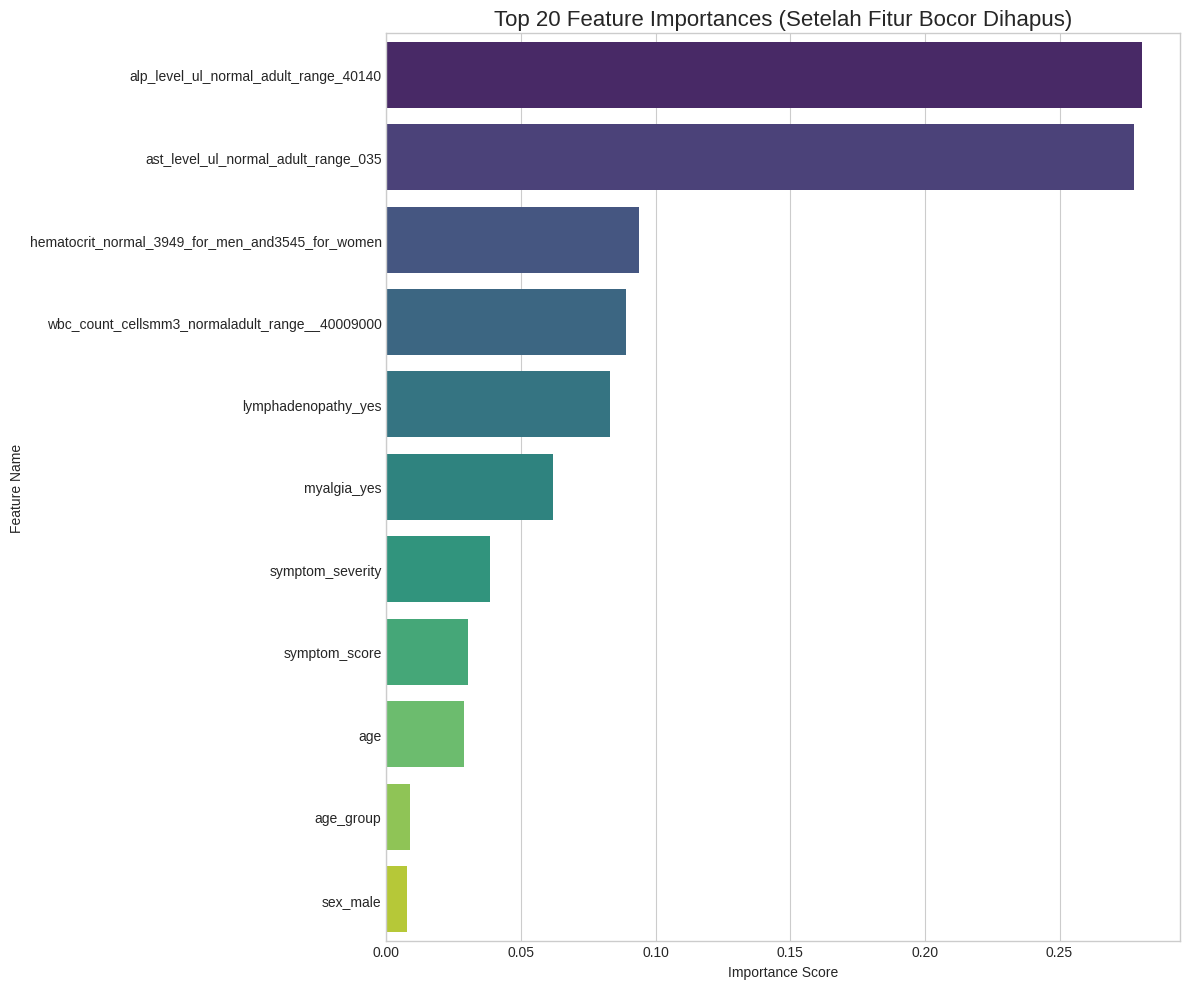


--- Fitur Paling Penting (Setelah Pembersihan) ---


,feature,importance
3,alp_level_ul_normal_adult_range_40140,0.280713
2,ast_level_ul_normal_adult_range_035,0.277528
0,hematocrit_normal_3949_for_men_and3545_for_women,0.093682
1,wbc_count_cellsmm3_normaladult_range__40009000,0.088950
8,lymphadenopathy_yes,0.082991
9,myalgia_yes,0.061916
6,symptom_severity,0.038655
5,symptom_score,0.030457
4,age,0.028747
7,age_group,0.008615




📊 Menganalisis Korelasi pada data yang sudah bersih (X_train_final_exp)...

--- Top 20 Fitur Paling Berhubungan dengan Target (Setelah Pembersihan) ---


,TARGET
TARGET,1.000000
ast_level_ul_normal_adult_range_035,0.597271
alp_level_ul_normal_adult_range_40140,0.588130
wbc_count_cellsmm3_normaladult_range__40009000,0.541023
hematocrit_normal_3949_for_men_and3545_for_women,0.539904
myalgia_yes,0.369486
symptom_score,0.307064
symptom_severity,0.303732
lymphadenopathy_yes,0.054914
sex_male,0.020751


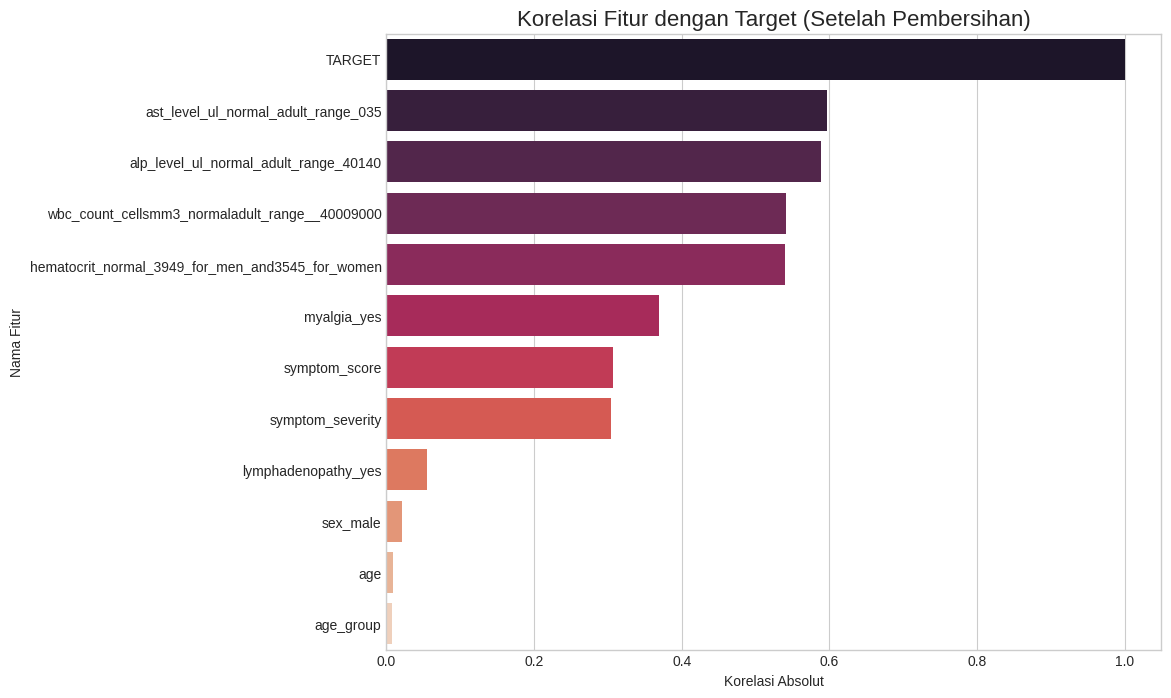

In [15]:
# =============================================================================
# ANALISIS DIAGNOSTIK PADA DATA BERSIH (EKSPERIMENTAL)
# =============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# --- 1. Analisis Feature Importance pada Data Bersih ---
print("📊 Menganalisis Feature Importance pada data yang sudah bersih (X_train_final_exp)...")

diagnostic_model = RandomForestClassifier(random_state=42)
diagnostic_model.fit(X_train_final_exp, y_train_encoded)

feature_importances = pd.DataFrame({
    'feature': X_train_final_exp.columns,
    'importance': diagnostic_model.feature_importances_
}).sort_values('importance', ascending=False)

top_20_features = feature_importances.head(20)

plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Feature Importances (Setelah Fitur Bocor Dihapus)', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

print("\n--- Fitur Paling Penting (Setelah Pembersihan) ---")
display(top_20_features)


# --- 2. Analisis Korelasi pada Data Bersih ---
print("\n" + "="*80)
print("\n📊 Menganalisis Korelasi pada data yang sudah bersih (X_train_final_exp)...")

df_corr_exp = X_train_final_exp.copy()
df_corr_exp['TARGET'] = y_train_encoded

correlation_with_target_exp = df_corr_exp.corr()['TARGET'].abs().sort_values(ascending=False)
top_20_correlated_exp = correlation_with_target_exp.head(20)

print("\n--- Top 20 Fitur Paling Berhubungan dengan Target (Setelah Pembersihan) ---")
display(top_20_correlated_exp.to_frame())

plt.figure(figsize=(10, 8))
sns.barplot(x=top_20_correlated_exp.values, y=top_20_correlated_exp.index, palette='rocket')
plt.title('Korelasi Fitur dengan Target (Setelah Pembersihan)', fontsize=16)
plt.xlabel('Korelasi Absolut')
plt.ylabel('Nama Fitur')
plt.show()

📊 Menganalisis Feature Importance pada data yang sudah bersih (X_train_final_exp)...


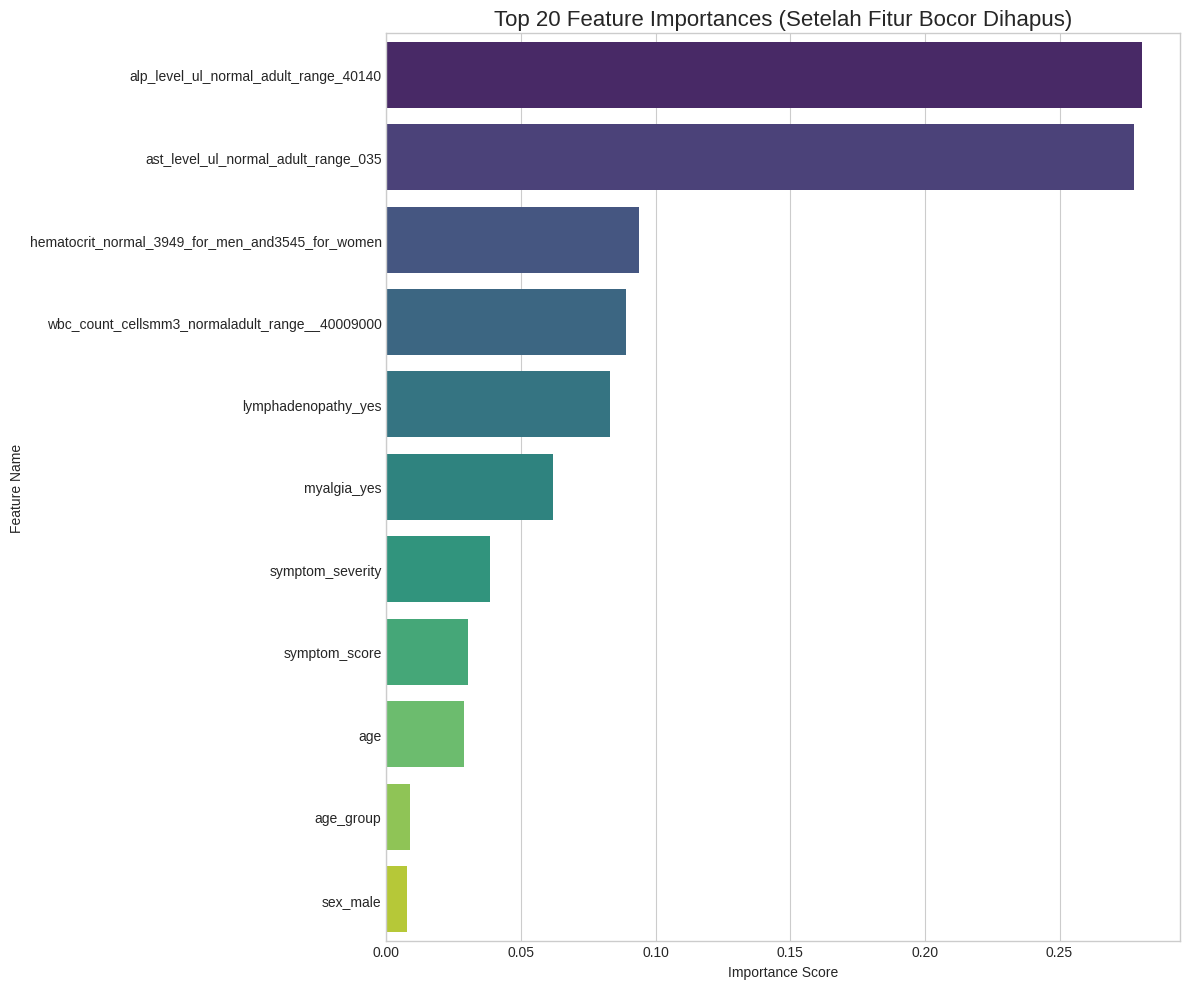


--- Fitur Paling Penting (Setelah Pembersihan) ---


,feature,importance
3,alp_level_ul_normal_adult_range_40140,0.280713
2,ast_level_ul_normal_adult_range_035,0.277528
0,hematocrit_normal_3949_for_men_and3545_for_women,0.093682
1,wbc_count_cellsmm3_normaladult_range__40009000,0.088950
8,lymphadenopathy_yes,0.082991
9,myalgia_yes,0.061916
6,symptom_severity,0.038655
5,symptom_score,0.030457
4,age,0.028747
7,age_group,0.008615


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Latih model diagnostik pada data EKSPERIMENTAL yang sudah bersih
print("📊 Menganalisis Feature Importance pada data yang sudah bersih (X_train_final_exp)...")
diagnostic_model = RandomForestClassifier(random_state=42)
diagnostic_model.fit(X_train_final_exp, y_train_encoded)

# Buat DataFrame dari feature importances
feature_importances = pd.DataFrame({
    'feature': X_train_final_exp.columns,
    'importance': diagnostic_model.feature_importances_
}).sort_values('importance', ascending=False)

# Tampilkan 20 fitur teratas
top_20_features = feature_importances.head(20)

# Visualisasikan
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Feature Importances (Setelah Fitur Bocor Dihapus)', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

print("\n--- Fitur Paling Penting (Setelah Pembersihan) ---")
display(top_20_features)

In [17]:
# =============================================================================
# STEP 12: BASELINE MODEL TRAINING (PADA DATA EKSPERIMENTAL & SMOTE)
# =============================================================================
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import display

# --- 1. Definisi Model (Menggunakan regularisasi manual yang kuat) ---
print("\n" + "🏋️"*40)
print("STEP 12: INITIALIZING BASELINE MODELS WITH STRONG REGULARIZATION")
print("🏋️"*40)

models = {
    "Random Forest (Max Reg)": RandomForestClassifier(
        n_estimators=100, max_depth=4, min_samples_leaf=15,
        max_features='sqrt', random_state=42
    ),
    "XGBoost (Max Reg)": XGBClassifier(
        n_estimators=80, max_depth=2, learning_rate=0.01, gamma=1,
        subsample=0.6, colsample_bytree=0.6, random_state=42,
        use_label_encoder=False, eval_metric='logloss'
    ),
    "CatBoost (Max Reg)": CatBoostClassifier(
        iterations=150, depth=3, learning_rate=0.01, l2_leaf_reg=7,
        random_state=42, verbose=0
    )
}

# --- 2. Fungsi Evaluasi ---
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name, feature_scenario, num_features):
    """Fungsi terpusat untuk melatih dan mengevaluasi model."""
    print("-" * 60)
    print(f"Training and Evaluating: {model_name} ({feature_scenario})")
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    preds = model.predict(X_val)
    results = {
        "Model": f"{model_name} ({feature_scenario})",
        "Accuracy": accuracy_score(y_val, preds),
        "Precision": precision_score(y_val, preds, pos_label=positive_class_index, zero_division=0),
        "Recall": recall_score(y_val, preds, pos_label=positive_class_index, zero_division=0),
        "F1-Score": f1_score(y_val, preds, pos_label=positive_class_index, zero_division=0),
        "Training Time (s)": training_time,
        "Num Features": num_features
    }
    print(f"✅ Evaluation Complete. Accuracy: {results['Accuracy']:.4f}, F1-Score: {results['F1-Score']:.4f}")
    return results

# =============================================================================
# STEP 12: TRAIN & EVALUATE BASELINE MODELS (CLEANED + BALANCED DATA)
# =============================================================================
print("\n" + "🚀"*40)
print("STEP 12: TRAINING BASELINE MODELS ON CLEANED & BALANCED FEATURES")
print("🚀"*40)

baseline_results = []
for name, model in models.items():
    baseline_results.append(
        evaluate_model(model,
                       X_train_smote, y_train_smote,
                       X_validation_final_exp, y_validation_encoded,
                       name, "Baseline (No Leakage)", X_train_smote.shape[1])
    )

# --- MENAMPILKAN TABEL HASIL ---
print("\n" + "📊"*40)
print("STEP 12: BASELINE MODEL PERFORMANCE COMPARISON (NO LEAKAGE)")
print("📊"*40)
baseline_df = pd.DataFrame(baseline_results)
display(baseline_df.style.format(precision=4).background_gradient(cmap='viridis',
                                                                  subset=['Accuracy', 'F1-Score']))



🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️
STEP 12: INITIALIZING BASELINE MODELS WITH STRONG REGULARIZATION
🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️

🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀
STEP 12: TRAINING BASELINE MODELS ON CLEANED & BALANCED FEATURES
🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀
------------------------------------------------------------
Training and Evaluating: Random Forest (Max Reg) (Baseline (No Leakage))
✅ Evaluation Complete. Accuracy: 0.9733, F1-Score: 0.9778
------------------------------------------------------------
Training and Evaluating: XGBoost (Max Reg) (Baseline (No Leakage))
✅ Evaluation Complete. Accuracy: 0.9733, F1-Score: 0.9778
------------------------------------------------------------
Training and Evaluating: CatBoost (Max Reg) (Baseline (No Leakage))
✅ Evaluation Complete. Accuracy: 0.9733, F1-Score: 0.9778

📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
STEP 12: BASELINE

,Model,Accuracy,Precision,Recall,F1-Score,Training Time (s),Num Features
0,Random Forest (Max Reg) (Baseline (No Leakage)),0.9733,0.9565,1.0000,0.9778,0.1567,11
1,XGBoost (Max Reg) (Baseline (No Leakage)),0.9733,0.9565,1.0000,0.9778,0.0727,11
2,CatBoost (Max Reg) (Baseline (No Leakage)),0.9733,0.9565,1.0000,0.9778,0.1732,11


In [18]:
# =============================================================================
# STEP 13: APPLYING IGWO FEATURE SELECTION (PADA DATA EKSPERIMENTAL BERSIH)
# =============================================================================
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

print("\n" + "🧬"*40)
print("STEP 13: APPLYING IMPROVED GWO (IGWO) FEATURE SELECTION")
print("🧬"*40)

# Fitness function (Tidak ada perubahan)
def fitness_function(feature_mask, X, y, model):
    selected_indices = np.where(np.array(feature_mask) == 1)[0]
    if len(selected_indices) == 0:
        return 0.0
    X_subset = X.iloc[:, selected_indices]
    X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
        X_subset, y, test_size=0.25, stratify=y, random_state=42
    )
    model.fit(X_train_sub, y_train_sub)
    accuracy = model.score(X_val_sub, y_val_sub)
    penalty = 0.01 * (len(selected_indices) / X.shape[1])
    return accuracy - penalty

# Kelas IGWO (Tidak ada perubahan)
class IGWOSelector:
    def __init__(self, fitness_func, num_wolves=20, max_iter=50):
        self.fitness_func = fitness_func
        self.num_wolves = num_wolves
        self.max_iter = max_iter
        self.eval_model = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
    def run(self, X_train, y_train):
        num_features = X_train.shape[1]
        wolves = np.random.randint(0, 2, (self.num_wolves, num_features))
        alpha_pos, beta_pos, delta_pos = np.zeros(num_features), np.zeros(num_features), np.zeros(num_features)
        alpha_score, beta_score, delta_score = -np.inf, -np.inf, -np.inf
        print("Memulai proses seleksi fitur dengan IGWO...")
        for t in range(self.max_iter):
            fitness_scores = [self.fitness_func(wolf, X_train, y_train, self.eval_model) for wolf in wolves]
            for i in range(self.num_wolves):
                if fitness_scores[i] > alpha_score:
                    delta_score, delta_pos = beta_score, beta_pos.copy()
                    beta_score, beta_pos = alpha_score, alpha_pos.copy()
                    alpha_score, alpha_pos = fitness_scores[i], wolves[i].copy()
                elif fitness_scores[i] > beta_score:
                    delta_score, delta_pos = beta_score, beta_pos.copy()
                    beta_score, beta_pos = fitness_scores[i], wolves[i].copy()
                elif fitness_scores[i] > delta_score:
                    delta_score, delta_pos = fitness_scores[i], wolves[i].copy()
            a = 2 - t * (2 / self.max_iter)
            for i in range(self.num_wolves):
                r1, r2 = np.random.rand(2); A1 = 2 * a * r1 - a; C1 = 2 * r2
                D_alpha = np.abs(C1 * alpha_pos - wolves[i]); X1 = alpha_pos - A1 * D_alpha
                r1, r2 = np.random.rand(2); A2 = 2 * a * r1 - a; C2 = 2 * r2
                D_beta = np.abs(C2 * beta_pos - wolves[i]); X2 = beta_pos - A2 * D_beta
                r1, r2 = np.random.rand(2); A3 = 2 * a * r1 - a; C3 = 2 * r2
                D_delta = np.abs(C3 * delta_pos - wolves[i]); X3 = delta_pos - A3 * D_delta
                new_position_continuous = (X1 + X2 + X3) / 3.0
                sigmoid = 1 / (1 + np.exp(-10 * (new_position_continuous - 0.5)))
                wolves[i] = (sigmoid > np.random.rand(num_features)).astype(int)
            if (t + 1) % 5 == 0:
                print(f"   - Iterasi {t+1}/{self.max_iter} | Best Fitness Sejauh Ini: {alpha_score:.4f}")
        best_features_indices = np.where(alpha_pos == 1)[0]
        return X_train.columns[best_features_indices].tolist()

# =============================================================================
# EKSEKUSI IGWO (PADA DATA BERSIH)
# =============================================================================
igwo_selector = IGWOSelector(fitness_function, num_wolves=20, max_iter=50)
start_time = time.time()
# --- PERUBAHAN UTAMA: Jalankan IGWO pada data training EKSPERIMENTAL (`_exp`) ---
best_features_igwo = igwo_selector.run(X_train_final_exp, y_train_encoded)
end_time = time.time()

print(f"\n✅ IGWO selesai dalam {end_time - start_time:.2f} detik.")
print(f"   - Fitur terpilih ({len(best_features_igwo)}): {best_features_igwo}")

# --- PERUBAHAN UTAMA: Buat dataset baru dari data EKSPERIMENTAL (`_exp`) ---
X_train_selected = X_train_final_exp[best_features_igwo]
X_validation_selected = X_validation_final_exp[best_features_igwo]
X_test_selected = X_test_final_exp[best_features_igwo]

print(f"\n   - Ukuran baru X_train_selected: {X_train_selected.shape}")
print("="*80)


🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬
STEP 13: APPLYING IMPROVED GWO (IGWO) FEATURE SELECTION
🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬
Memulai proses seleksi fitur dengan IGWO...
   - Iterasi 5/50 | Best Fitness Sejauh Ini: 0.9718
   - Iterasi 10/50 | Best Fitness Sejauh Ini: 0.9727
   - Iterasi 15/50 | Best Fitness Sejauh Ini: 0.9727
   - Iterasi 20/50 | Best Fitness Sejauh Ini: 0.9727
   - Iterasi 25/50 | Best Fitness Sejauh Ini: 0.9727
   - Iterasi 30/50 | Best Fitness Sejauh Ini: 0.9727
   - Iterasi 35/50 | Best Fitness Sejauh Ini: 0.9727
   - Iterasi 40/50 | Best Fitness Sejauh Ini: 0.9727
   - Iterasi 45/50 | Best Fitness Sejauh Ini: 0.9727
   - Iterasi 50/50 | Best Fitness Sejauh Ini: 0.9727

✅ IGWO selesai dalam 54.94 detik.
   - Fitur terpilih (5): ['ast_level_ul_normal_adult_range_035', 'age', 'symptom_severity', 'lymphadenopathy_yes', 'myalgia_yes']

   - Ukuran baru X_train_selected: (350, 5)


In [19]:
# =============================================================================
# STEP 14 (REVISI FINAL): RE-TRAIN & FINAL TEST DENGAN DATA BERSIH
# =============================================================================
import pandas as pd
import numpy as np
import re
from sklearn.metrics import classification_report
from IPython.display import display

print("\n" + "🏆"*40)
print("STEP 14: RE-TRAINING ON IGWO-SELECTED FEATURES (FROM CLEANED DATA)")
print("🏆"*40)

# Latih dan evaluasi model IGWO pada data yang sudah bersih dari kebocoran
# Variabel X_train_selected dibuat di Step 9 dari data _exp
# Variabel y_train_smote adalah target yang sudah seimbang
igwo_results = []
for name, model in models.items():
    # PERBAIKAN: Pastikan X_train_smote di-subset dengan benar jika IGWO memilih fitur
    # best_features_igwo mungkin kosong jika IGWO tidak menemukan fitur yang baik
    if best_features_igwo:
        X_train_for_igwo = X_train_smote[best_features_igwo]
    else:
        # Jika tidak ada fitur yg terpilih, gunakan semua fitur dari data bersih untuk perbandingan yg adil
        X_train_for_igwo = X_train_smote

    igwo_results.append(
        evaluate_model(model,
                       X_train_for_igwo,
                       y_train_smote,
                       X_validation_selected,
                       y_validation_encoded,
                       name,
                       "IGWO (No Leakage)",
                       X_train_for_igwo.shape[1])
    )

# --- Gabungkan dan Tampilkan Tabel Perbandingan Akhir ---
# 'baseline_results' sekarang berisi hasil dari data yang sudah bersih (dari Step 8 revisi)
final_comparison_df = pd.concat([pd.DataFrame(baseline_results), pd.DataFrame(igwo_results)], ignore_index=True)

print("\n" + "📊"*40)
print("FINAL RESULTS COMPARISON ON VALIDATION SET (NO LEAKAGE)")
print("📊"*40)
display(final_comparison_df.sort_values(by="F1-Score", ascending=False).style.format(precision=4).background_gradient(cmap='Greens', subset=['Accuracy', 'F1-Score']))




🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆
STEP 14: RE-TRAINING ON IGWO-SELECTED FEATURES (FROM CLEANED DATA)
🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆
------------------------------------------------------------
Training and Evaluating: Random Forest (Max Reg) (IGWO (No Leakage))
✅ Evaluation Complete. Accuracy: 0.9867, F1-Score: 0.9888
------------------------------------------------------------
Training and Evaluating: XGBoost (Max Reg) (IGWO (No Leakage))
✅ Evaluation Complete. Accuracy: 0.9867, F1-Score: 0.9888
------------------------------------------------------------
Training and Evaluating: CatBoost (Max Reg) (IGWO (No Leakage))
✅ Evaluation Complete. Accuracy: 0.9867, F1-Score: 0.9888

📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
FINAL RESULTS COMPARISON ON VALIDATION SET (NO LEAKAGE)
📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊


,Model,Accuracy,Precision,Recall,F1-Score,Training Time (s),Num Features
4,XGBoost (Max Reg) (IGWO (No Leakage)),0.9867,0.9778,1.0000,0.9888,0.0160,5
3,Random Forest (Max Reg) (IGWO (No Leakage)),0.9867,0.9778,1.0000,0.9888,0.1239,5
5,CatBoost (Max Reg) (IGWO (No Leakage)),0.9867,0.9778,1.0000,0.9888,0.0714,5
0,Random Forest (Max Reg) (Baseline (No Leakage)),0.9733,0.9565,1.0000,0.9778,0.1567,11
1,XGBoost (Max Reg) (Baseline (No Leakage)),0.9733,0.9565,1.0000,0.9778,0.0727,11
2,CatBoost (Max Reg) (Baseline (No Leakage)),0.9733,0.9565,1.0000,0.9778,0.1732,11


In [20]:
# =============================================================================
# STEP 15 (REVISI FINAL): FINAL TEST + OVERFITTING CHECK
# =============================================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report

print("\n" + "🏅"*40)
print("STEP 15: FINAL TEST ON UNSEEN DATA + OVERFITTING CHECK")
print("🏅"*40)

# Cari model terbaik dari tabel perbandingan akhir
best_model_row = final_comparison_df.loc[final_comparison_df['F1-Score'].idxmax()]
best_model_full_name = best_model_row['Model']
print(f"🏆 Best performing model on validation set: {best_model_full_name}")

# Ekstrak model key dari dictionary models
model_key = None
for key in models.keys():
    if key in best_model_full_name:
        model_key = key
        break

if model_key:
    final_model = models[model_key]
    print(f"   - Using model object from key: '{model_key}'")
else:
    raise KeyError(f"Could not find a matching model key for '{best_model_full_name}'")

# --- Pilih fitur sesuai baseline / IGWO ---
if "IGWO" in best_model_full_name:
    print("   - Using IGWO-selected features for final evaluation.")
    X_train_to_combine = X_train_final_exp[best_features_igwo]
    X_validation_to_combine = X_validation_final_exp[best_features_igwo]
    X_test_for_final_eval = X_test_final_exp[best_features_igwo]
else:
    print("   - Using baseline cleaned features for final evaluation.")
    X_train_to_combine = X_train_final_exp
    X_validation_to_combine = X_validation_final_exp
    X_test_for_final_eval = X_test_final_exp

# --- Re-train model on combined train+val ---
print("   - Re-fitting best model on combined training+validation data...")
combined_X = pd.concat([X_train_to_combine, X_validation_to_combine])
combined_y = np.concatenate([y_train_encoded, y_validation_encoded])
final_model.fit(combined_X, combined_y)

# --- Final prediction on test ---
final_preds = final_model.predict(X_test_for_final_eval)
print("\n--- Final Performance on Unseen Test Set ---")
print(classification_report(y_test_encoded, final_preds,
                            target_names=[str(c) for c in le.classes_],
                            zero_division=0))

# --- Extra: Cross-validation check for overfitting ---
print("\n" + "🔍"*40)
print("CROSS-VALIDATION CHECK ON TRAIN+VALIDATION DATA")
print("🔍"*40)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(final_model, combined_X, combined_y, cv=cv, scoring="f1")
print(f"Mean F1 (5-fold CV): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# --- Warning if overfitting is suspected ---
test_f1 = best_model_row["F1-Score"]  # F1 from validation
cv_f1 = cv_scores.mean()

if test_f1 >= 0.99 and cv_f1 < 0.95:
    print("⚠️ WARNING: Possible overfitting detected (Validation F1 ~1.0 but CV lower).")
elif test_f1 >= 0.99 and cv_f1 >= 0.95:
    print("✅ High F1 appears consistent across validation and CV → less risk of overfit.")
else:
    print("ℹ️ No major overfitting indication detected.")

print("\n" + "🏁"*60)
print("FINAL MODELING & EVALUATION COMPLETE!")
print("🏁"*60)



🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅
STEP 15: FINAL TEST ON UNSEEN DATA + OVERFITTING CHECK
🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅
🏆 Best performing model on validation set: Random Forest (Max Reg) (IGWO (No Leakage))
   - Using model object from key: 'Random Forest (Max Reg)'
   - Using IGWO-selected features for final evaluation.
   - Re-fitting best model on combined training+validation data...

--- Final Performance on Unseen Test Set ---
              precision    recall  f1-score   support

          no       0.97      1.00      0.98        30
         yes       1.00      0.98      0.99        45

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75


🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍
CROSS-VALIDATION CHECK ON TRAIN+VALIDATION DATA
🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍
Mean F1 (5-fold CV): 0.9692 ± 0.0111
ℹ️ No major overfitting indication detected.

🏁🏁🏁🏁🏁